In [ ]:
# Person 1 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
df= pd.read_csv("_BANKRUPTCY_PREDICTION.csv")
df.head()

In [ ]:
df = df.dropna()

In [ ]:
df.head()

In [ ]:
for name in df:
    print(name)

# Select only interested Features

In [ ]:
df1 = df[["Bankrupt", " Net Income to Total Assets", " Interest Coverage Ratio (Interest expense to EBIT)",
         " Cash Flow to Liability", " Retained Earnings to Total Assets", " Total Asset Growth Rate", 
         " Operating Profit Rate", " Cash flow rate", " After-tax net Interest Rate", " Operating Profit Per Share (Yuan �",
         " Operating Expense Rate", " Cash Flow to Sales", " Cash Reinvestment %", " Cash Flow Per Share", 
         " CFO to Assets", " Cash/Current Liability"]]

In [ ]:
df1.dtypes

In [ ]:
df1.hist(figsize = (40,40))

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(), cmap = "Blues")

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt']==1][' Net Income to Total Assets'])
sns.kdeplot(df[df['Bankrupt']==0][' Net Income to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Net income to total assets')

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt']==1][' Retained Earnings to Total Assets'])
sns.kdeplot(df[df['Bankrupt']==0][' Retained Earnings to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Retained Earnings to Total Assets')

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt']==1][' Total Asset Growth Rate'])
sns.kdeplot(df[df['Bankrupt']==0][' Total Asset Growth Rate'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Total Asset Growth Rate')

In [ ]:
X = df1.drop(columns = "Bankrupt")
Y = df1["Bankrupt"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

# SMOTE the variables to correct the imbalanced dataset

In [ ]:
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

# Normalise the train set

In [ ]:
X_train = stats.zscore(X_train)
X_test = stats.zscore(X_test)

In [ ]:
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [ ]:
skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(4,4))

In [ ]:
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [ ]:
skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(4,4))

In [ ]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

In [ ]:
skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(4,4))

In [ ]:
model = neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

In [ ]:
skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(4,4))

In [ ]:
################################ Person 2 ###############################

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("_BANKRUPTCY_PREDICTION.csv")
data.head()

In [ ]:
print("Shape of Data:",data.shape)
r, c = data.shape
print("Number of Rows:",r)
print("Number of Columns:",c)

In [ ]:
print("Names of Column:")
print(data.columns)

In [ ]:
print("Number of Null Values:",data.isnull().sum())

In [ ]:
print("Number of Duplicate Values: ",data.duplicated().sum())

In [ ]:
print("Information about the Dataset")
data.info()

In [ ]:
plt.figure()
sns.countplot(x = 'Bankrupt',data = data )
plt.show()

In [ ]:
print("Descriptive Stastices")
data.describe()

In [ ]:
#Feature Selecing
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif

# to select the features
from sklearn.feature_selection import SelectKBest

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

# X_train.shape, X_test.shape
print("Training Dataset Shape:",X_train.shape)
r, c = X_train.shape
print("Rows= ",r )
print("Columns= ",c)
print("Testing Dataset Shape:",X_test.shape)
r, c = X_test.shape
print("Rows= ",r )
print("Columns= ",c)

In [ ]:
#Determine Mutual Information
mi = mutual_info_classif(X_train, y_train)
mi

In [ ]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [ ]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

In [ ]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [ ]:
# X_train.shape,X_test.shape
r, c = X_train.shape
print("Train Dataset:")
print("Rows=",r)
print("Column=",c)
r, c = X_test.shape
print("Test Dataset:")
print("Rows=",r)
print("Column=",c)

In [ ]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#1. Logestic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print("Accuracy score for Logistic Regression Model: {:.2f} %".format(acc1*100))

In [ ]:
#2. SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
#Predict the tset set result of SVM
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc2 = accuracy_score(y_test, y_pred)
print("Accuracy score for SVM Model: {:.2f} %".format(acc2*100))

In [ ]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc3 = accuracy_score(y_test, y_pred)
print("Best Accuracy of K-NN: {:.2f} %".format(acc3*100))

In [ ]:
#4. Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Naive Bayes: {acc4}")

In [ ]:
#5. Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Decision Tree: {acc5}")

In [ ]:
#6. Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Random Forest Classification accuracy: {acc6}")

In [ ]:
#Create visualization of all models
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RFC")

plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()


In [ ]:
df = data.copy()
df.head()

In [ ]:
X = df.drop(['Bankrupt'],axis=1).values
y = df['Bankrupt'].values

In [ ]:
#Split the Dataset for PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
#Feature Scalling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
pca_acc = accuracy_score(y_test, y_pred)

In [ ]:
print(f"PCA Accuracy is: {pca_acc}")

In [ ]:
#Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
#Visualising the Training set results
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
# import matplotlib.gridspec as gridspec
%matplotlib inline

plot_decision_regions(X=X_train, y=y_train, clf=classifier, legend=2)

In [ ]:
#Visualising the Testing set results
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
# import matplotlib.gridspec as gridspec
%matplotlib inline

plot_decision_regions(X=X_test, y=y_test, clf=classifier, legend=2)

In [ ]:
##########################################################################################################

In [ ]:
############### Person 3 ####################

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
import xgboost as XGB
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('_BANKRUPTCY_PREDICTION.csv')
df.head(5)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df['Bankrupt'].value_counts()

In [ ]:
sns.countplot(x = df['Bankrupt'])
plt.title('Bankrupt')

In [ ]:
df.hist(bins = 40, figsize = (20,20))

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap = 'Reds')

In [ ]:
def preprocess(df):
    df = df.copy()
    y = df['Bankrupt']
    X = df.drop('Bankrupt', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
    
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess(df)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_test.value_counts() / len(y_test)

In [ ]:
var_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (kernel SVM)": SVC(kernel = 'rbf', random_state = 0),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models.items():
  model.fit(X_train, y_train)
  print(name + ' was completed.')


In [ ]:
var_results = []

for name, model in var_models.items():
  results = model.score(X_test, y_test)
  var_results.append(results)

  print('----------     '+name+'     ----------')

  model = var_models[name]
  y_test_pred = model.predict(X_test)
  print(metrics.classification_report(y_test_pred, y_test))
  print(name + ': {:.4f}%'.format(results * 100))
  print('Accuracy :{0:0.4f}'.format(metrics.accuracy_score(y_test_pred , y_test))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test_pred , y_test)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test_pred , y_test)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test_pred , y_test)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test_pred , y_test)))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models:
    y_pred = var_models[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a Bankruptcy')
plt.legend(loc=4)
plt.show()

In [ ]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models.items():
    results = model.score(X_test, y_test)
    model = var_models[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()


In [ ]:
# till now we just run models with scaling or tranforming perform model of original data as it is. 
# now with preprocessing data and modeling with SMOTE

In [ ]:
def preprocess(df):
    df = df.copy()
    y = df['Bankrupt']
    X = df.drop('Bankrupt', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
      
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
  
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess(df)

In [ ]:
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
sns.countplot(x = y_train_smote)
plt.title('Bankrupt?')

In [ ]:
var_models_smote = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_smote.items():
  model.fit(X_train_smote, y_train_smote)
  print(name + ' was completed.')

In [ ]:
var_results_smote = []

for name, model in var_models_smote.items():
  results_smote = model.score(X_test, y_test)
  var_results_smote.append(results_smote)

  print('----------     '+name+'     ----------')

  model = var_models_smote[name]
  y_test_pred_smote = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_smote))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_smote))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_smote)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_smote)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_smote)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_smote)))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_smote:
    y_pred = var_models_smote[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a Bankruptcy')
plt.legend(loc=4)
plt.show()

In [ ]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_smote.items():
    results = model.score(X_test, y_test)
    model = var_models_smote[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()

# Now Preprocess data and modelling with ADASYN.

In [ ]:
def preprocess(df):
    df = df.copy()
    y = df['Bankrupt']
    X = df.drop('Bankrupt', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
      
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
  
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess(df)

In [ ]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [ ]:
sns.countplot(x = y_train_adasyn)
plt.title('Bankrupt')

In [ ]:
var_models_adasyn = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_adasyn.items():
  model.fit(X_train_adasyn, y_train_adasyn)
  print(name + ' was completed.')

In [ ]:
var_results_adasyn = []

for name, model in var_models_adasyn.items():
  results_adasyn = model.score(X_test, y_test)
  var_results_adasyn.append(results_adasyn)

  print('----------     '+name+'     ----------')

  model = var_models_adasyn[name]
  y_test_pred_adasyn = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_adasyn))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_adasyn))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_adasyn)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_adasyn)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_adasyn)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_adasyn)))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_adasyn:
    y_pred = var_models_adasyn[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a Bankruptcy')
plt.legend(loc=4)
plt.show()

In [ ]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_adasyn.items():
    results = model.score(X_test, y_test)
    model = var_models_adasyn[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()

In [ ]:
##############################################################################################################################

In [ ]:
################################################## Person 4 ###################################################################

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("_BANKRUPTCY_PREDICTION.csv")
df.head()

In [ ]:
# Defining data
x = df.drop('Bankrupt', axis=1)
y = df['Bankrupt']

In [ ]:
x.head()

In [ ]:
# SMOTE application because we have an unbalanced data set
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
# Split data into train and test
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [ ]:
# Standardisation
X_train, Y_train = x, y

In [ ]:
scaler = StandardScaler()
models = scaler.fit(X_train)
sX = models.transform(X_train)

In [ ]:
# Model selection
model = RandomForestClassifier()
model.fit(sX, Y_train)
# pred = model.predict(sx)

In [ ]:
test_df = pd.read_csv(input_path + 'test.csv')

In [ ]:
test_data = test_df.drop('case_id', axis = 1)

In [ ]:
test_data_transform = models.transform(test_data)

In [ ]:
pred = model.predict(test_data_transform)
pred

In [ ]:
brank = pred.tolist()

In [ ]:
res_dic = {
    'case_id' : case_id,
    'Bankrupt?' : brank
}

In [ ]:
res_file = pd.DataFrame(res_dic)

In [ ]:
res_file.to_csv('./predict.csv', index=False, sep=',')

In [ ]:
############################################################################

In [ ]:
########################### Person 5 #####################################

In [1]:
# Importing libraries and loading data
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif  # ANOVA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import (
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
    RepeatedStratifiedKFold
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

%matplotlib inline

In [2]:
data = pd.read_csv("_BANKRUPTCY_PREDICTION.csv")
data.head(3)

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564050                0.016469   
1                                           0.570175                0.020794   
2                                           0.563706                0.016474   

   Bankrupt  
0         1  
1         1  
2         1  

[3 rows x 95 columns]

In [3]:
# Copy the data
df = data.copy()

In [4]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [5]:
df.isnull().sum().head(20)

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Value Per Share (B)                                    0
 Net Val

In [6]:
# Describing the data
df.shape

(6819, 95)

In [7]:
df.describe().style.background_gradient()

In [8]:
# Data visualization - Distribution of correlations in relation to `Bankrupt`
df_corr_bar = df.corr()["Bankrupt"].sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation="h", color_discrete_sequence=["#C1E1C1"])
fig.update_layout(showlegend=False)
fig.show()

In [10]:
# Getting the six most positive and negative correlations with the variable `Bankrupt?`
numeric_features = df.select_dtypes(include=["float64"]).columns
categorical_features = df.select_dtypes(include=["int64"]).columns

positive_corr = (
    df[numeric_features]
    .corrwith(df["Bankrupt"])
    .sort_values(ascending=False)[:6]
    .index.tolist()
)
negative_corr = (
    df[numeric_features].corrwith(df["Bankrupt"]).sort_values()[:6].index.tolist()
)
print(f"{positive_corr}\n\n{negative_corr}")

[' Debt ratio %', ' Current Liability to Assets', ' Borrowing dependency', ' Current Liability to Current Assets', ' Liability to Equity', ' Current Liabilities/Equity']

[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons']



False => [6599]
True => [220]



<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

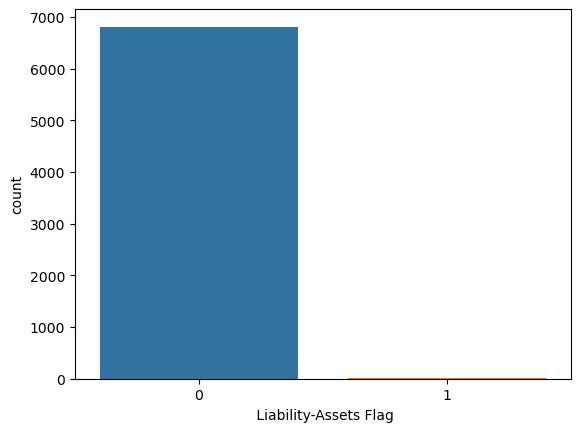

In [11]:
print(f"""
False => {df[df["Bankrupt"] == 0]["Bankrupt"].value_counts().values}
True => {df[df["Bankrupt"] == 1]["Bankrupt"].value_counts().values}
""")
sns.countplot(data=df, x=categorical_features[0])

<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

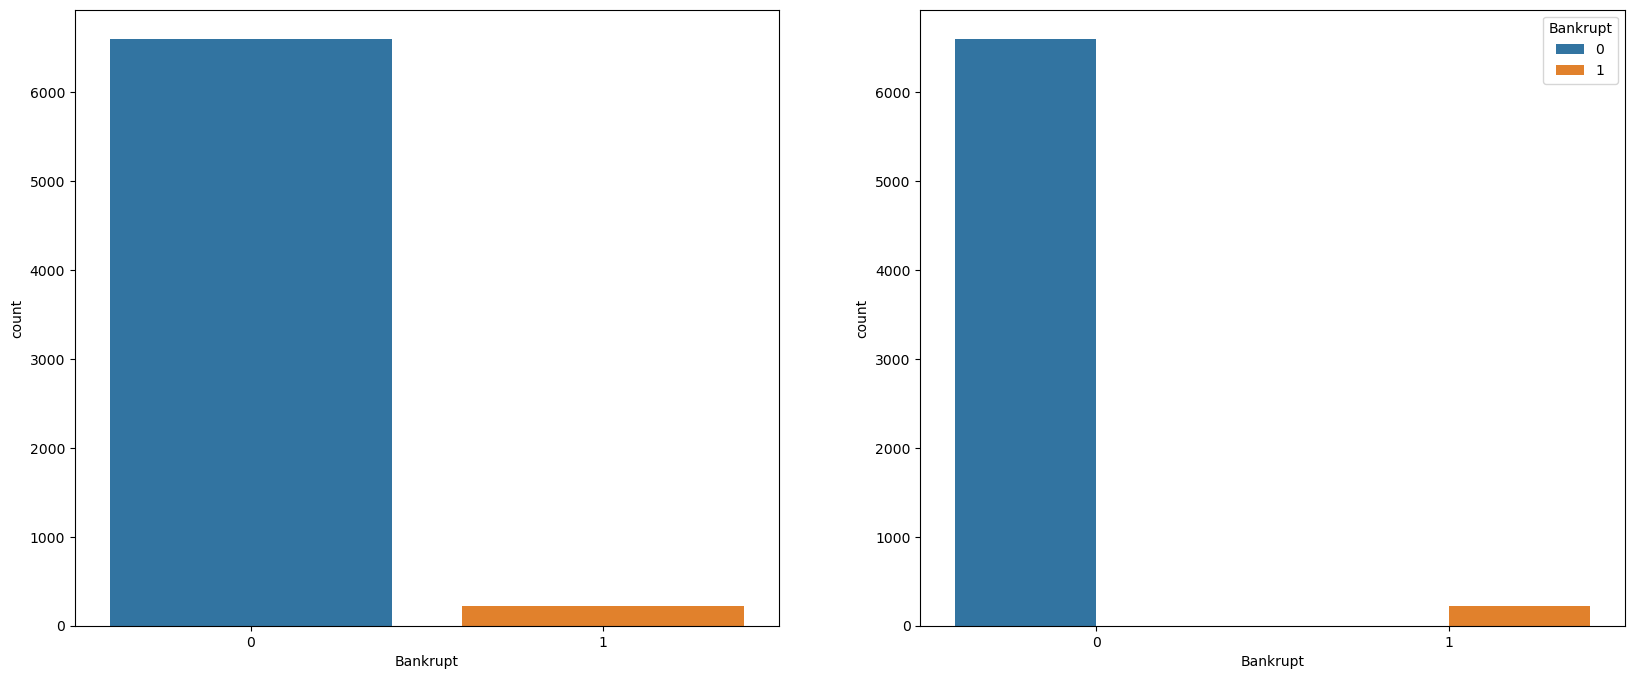

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x=categorical_features[1], ax=ax[0])
sns.countplot(data=df, x=categorical_features[1], hue="Bankrupt", ax=ax[1])

In [13]:
# Only a small fraction of companies go bankrupt, even if they have more assets than liabilities
# In comparison, more companies go bankrupt with fewer assets than liabilities

IndexError: index 2 is out of bounds for axis 0 with size 2

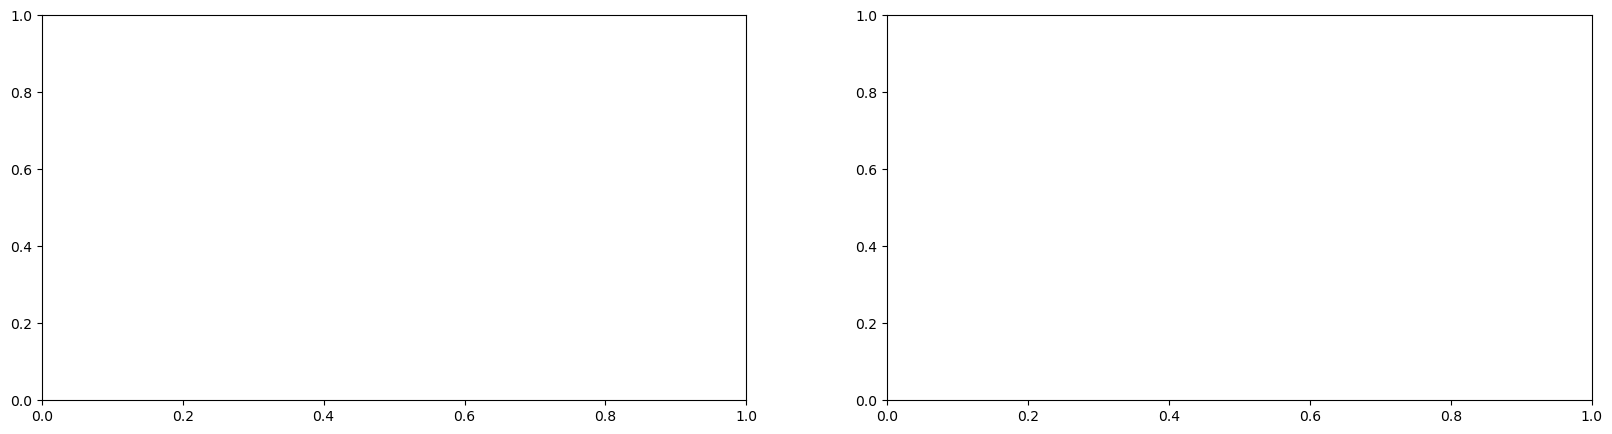

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(data=df, x=categorical_features[2], ax=ax[0])
sns.countplot(data=df, x=categorical_features[2], hue="Bankrupt", ax=ax[1])

Text(0.5, 0.98, 'Positive correlations')

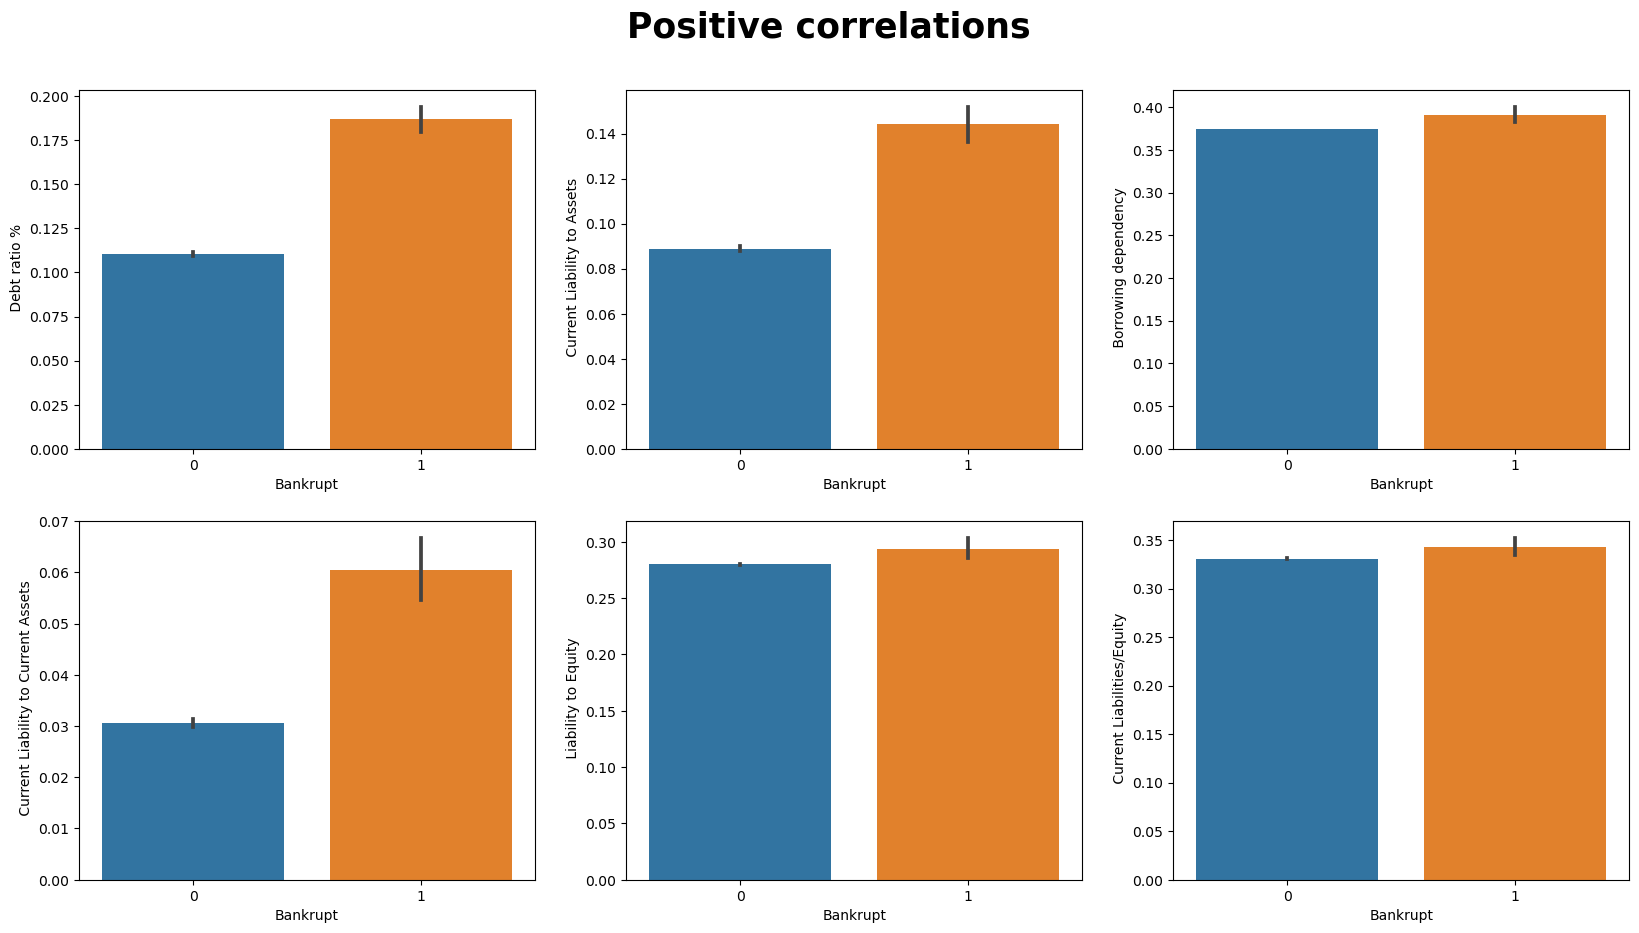

In [17]:
col = 0
row = 0

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for column in positive_corr:
    sns.barplot(data=df, y=column, x="Bankrupt", ax=ax[row, col])

    col += 1
    if col > 2:
        row += 1
        col = 0

fig.subplots_adjust(top=0.90)
plt.suptitle("Positive correlations", fontweight="bold", fontsize=25)

In [18]:
# We can see that for bankrupt companies Debt %, Current Liabilities to Assets and Current Liabilities to Current Assets have high values

Text(0.5, 0.98, 'Negative correlations')

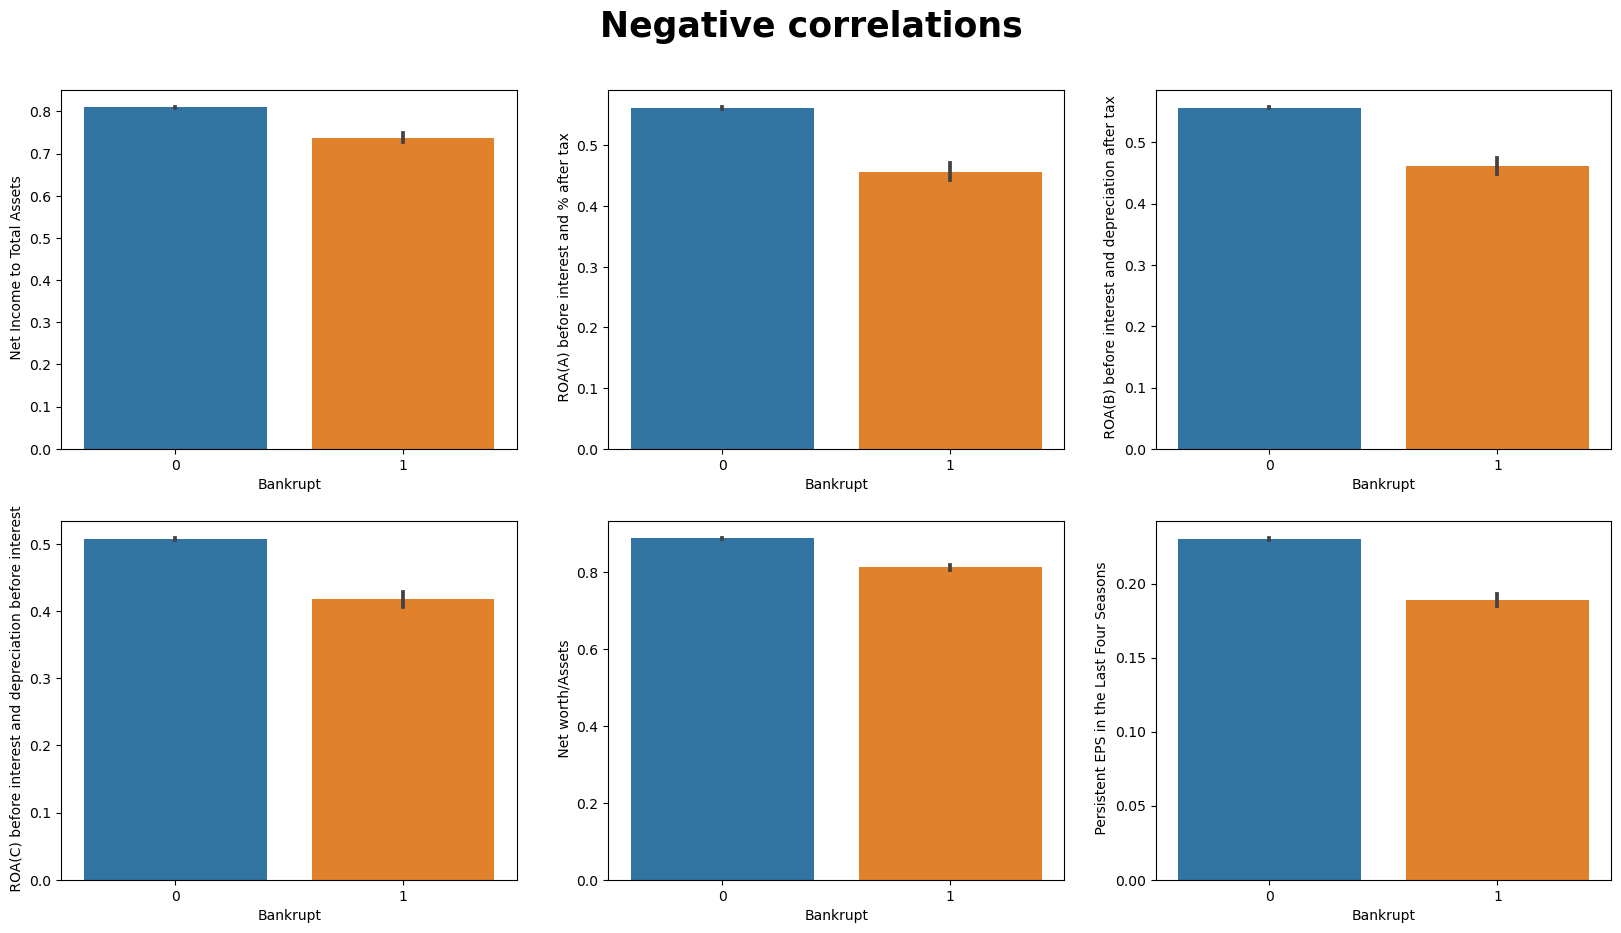

In [20]:
col = 0
row = 0

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for column in negative_corr:
    sns.barplot(data=df, y=column, x="Bankrupt", ax=ax[row, col])

    col += 1
    if col > 2:
        row += 1
        col = 0

fig.subplots_adjust(top=0.90)
plt.suptitle("Negative correlations", fontweight="bold", fontsize=25)

In [23]:
# The higher the assets and profits, the less likely the company is to go bankrupt
X = df.drop(["Bankrupt"], axis=1)
y = df["Bankrupt"]

In [24]:
# Reducing the number of dimensions

In [25]:
F_values = f_classif(X, y)[0]
print(F_values)

[4.97535121e+02 5.93228629e+02 5.49202093e+02 6.89187556e+01
 6.80891089e+01 3.60041238e-04 4.94483704e-01 5.34838454e-01
 1.87734357e+00 4.80452776e-01 2.52276733e-01 4.00521439e+00
 3.58770438e+01 3.62784529e+00 8.30443372e+01 1.91736866e+02
 1.91893599e+02 1.90273698e+02 3.45267516e+02 4.12096205e+01
 1.50081075e-01 1.40388750e+02 2.88185466e+02 1.43235883e-03
 1.56872493e+00 9.74554151e+00 9.25427523e+00 6.02518998e-01
 1.34841658e+01 2.92192096e+01 1.93781495e+00 1.80193668e+01
 3.33336591e-02 4.28320538e+00 4.89969009e-02 1.03378029e+00
 4.55091150e+02 4.55091150e+02 1.95215134e+00 2.19303340e+02
 3.40073044e+01 1.38500753e+02 3.07823235e+02 3.88506635e+01
 3.15889105e+01 1.54062607e-01 2.92973843e-01 1.29042565e-02
 3.63398317e+01 3.03323609e+00 1.07712008e+01 5.92711410e+01
 5.45508987e-02 2.63987646e+02 5.12499829e+01 1.37238238e+01
 6.90398134e+01 9.96226941e-02 4.16436074e+01 2.68012457e+02
 4.07461814e+01 2.47740425e-02 4.60719630e-03 2.95323127e+00
 1.51024876e+02 1.652214

In [26]:
selector = SelectKBest(f_classif, k=32)
X_fs = selector.fit_transform(X, y)

In [27]:
print("Data with initial features")
pd.DataFrame(X).head(3)

Data with initial features


ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   

    Continuous interest rate (after tax)  ...   Liability-Assets Flag  \
0                               0.780985  ...                       0   
1                               0.781506  ...                       0   
2                               0.780284  ...                       0   

    Net Income to Total Assets   Total assets to GNP price  \
0                     0.716845                    0.009219   
1                     0.795297                    0.008323   
2                     0.774670                    0.040003   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  
0                                           0.564050                0.016469  
1                                           0.570175                0.020794  
2                                           0.563706                0.016474  

[3 rows x 94 columns]

In [28]:
print("Data with selected features")
X_fs = X[selector.get_feature_names_out()]
X_fs.head(3)

Data with selected features


ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    

    Operating Gross Margin   Tax rate (A)   Net Value Per Share (B)  \
0                 0.601457            0.0                  0.147950   
1                 0.610235            0.0                  0.182251   
2                 0.601450            0.0                  0.177911   

    Net Value Per Share (A)   Net Value Per Share (C)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.193713   

    Persistent EPS in the Last Four Seasons  \
0                                  0.169141   
1                                  0.208944   
2                                  0.180581   

    Operating Profit Per Share (Yuan �  ...   Total expense/Assets  \
0                             0.095921  ...               0.064856   
1                             0.093722  ...               0.025516   
2                             0.092338  ...               0.021387   

    Current Liability to Equity   Equity to Long-term Liability  \
0                      0.339077                        0.126549   
1                      0.329740                        0.120916   
2                      0.334777                        0.117922   

    CFO to Assets   Current Liability to Current Assets  \
0        0.520382                              0.118250   
1        0.567101                              0.047775   
2        0.538491                              0.025346   

    Liability-Assets Flag   Net Income to Total Assets  \
0                       0                     0.716845   
1                       0                     0.795297   
2                       0                     0.774670   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                0.601453                             0.827890   
1                0.610237                             0.839969   
2                0.601449                             0.836774   

    Liability to Equity  
0              0.290202  
1              0.283846  
2              0.290189  

[3 rows x 32 columns]

In [29]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_fs, y, stratify=y, test_size=0.20, random_state=42
)

In [30]:
oversample = ADASYN(random_state=42, sampling_strategy="minority")

In [31]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

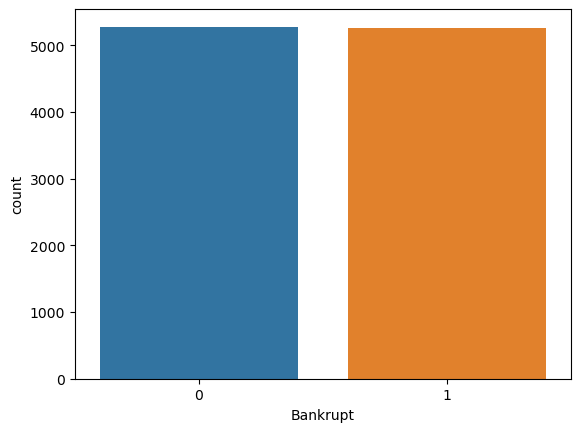

In [32]:
sns.countplot(data=X_train, x=y_train)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
models_comparison = {}

In [36]:
# Model training
warnings.filterwarnings("ignore")

i = 0
models_name = [
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "XGBClassifier",
    "CatBoostClassifier"
]

models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42),
    CatBoostClassifier(random_state=42)
]

for model in models:
    print(f"Model: {models_name[i]}\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{models_name[i]}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test),
        precision_score(y_pred, y_test),
        recall_score(y_pred, y_test),
        roc_auc_score(y_pred, y_test),
    ]
    i += 1

Model: DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1320
           1       0.23      0.48      0.31        44

    accuracy                           0.93      1364
   macro avg       0.60      0.71      0.63      1364
weighted avg       0.96      0.93      0.94      1364

------------------------------ 

Model: RandomForestClassifier

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.32      0.61      0.42        44

    accuracy                           0.95      1364
   macro avg       0.65      0.79      0.70      1364
weighted avg       0.97      0.95      0.95      1364

------------------------------ 

Model: KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.18      0.70      0.29        44

    accuracy             

134:	learn: 0.1852568	total: 1.39s	remaining: 8.93s
135:	learn: 0.1848562	total: 1.4s	remaining: 8.91s
136:	learn: 0.1842635	total: 1.41s	remaining: 8.89s
137:	learn: 0.1835068	total: 1.42s	remaining: 8.87s
138:	learn: 0.1827400	total: 1.43s	remaining: 8.85s
139:	learn: 0.1822582	total: 1.44s	remaining: 8.82s
140:	learn: 0.1815062	total: 1.44s	remaining: 8.8s
141:	learn: 0.1808572	total: 1.45s	remaining: 8.78s
142:	learn: 0.1803419	total: 1.46s	remaining: 8.76s
143:	learn: 0.1800417	total: 1.47s	remaining: 8.73s
144:	learn: 0.1794891	total: 1.48s	remaining: 8.71s
145:	learn: 0.1791338	total: 1.48s	remaining: 8.68s
146:	learn: 0.1785839	total: 1.49s	remaining: 8.65s
147:	learn: 0.1780264	total: 1.5s	remaining: 8.62s
148:	learn: 0.1776057	total: 1.5s	remaining: 8.59s
149:	learn: 0.1770718	total: 1.51s	remaining: 8.56s
150:	learn: 0.1766576	total: 1.52s	remaining: 8.54s
151:	learn: 0.1759249	total: 1.53s	remaining: 8.52s
152:	learn: 0.1752614	total: 1.53s	remaining: 8.5s
153:	learn: 0.174

307:	learn: 0.1153843	total: 2.82s	remaining: 6.34s
308:	learn: 0.1151706	total: 2.83s	remaining: 6.33s
309:	learn: 0.1149691	total: 2.84s	remaining: 6.32s
310:	learn: 0.1145989	total: 2.85s	remaining: 6.31s
311:	learn: 0.1143039	total: 2.86s	remaining: 6.3s
312:	learn: 0.1138949	total: 2.86s	remaining: 6.29s
313:	learn: 0.1135226	total: 2.87s	remaining: 6.28s
314:	learn: 0.1131694	total: 2.88s	remaining: 6.27s
315:	learn: 0.1128708	total: 2.89s	remaining: 6.26s
316:	learn: 0.1125978	total: 2.9s	remaining: 6.25s
317:	learn: 0.1122073	total: 2.91s	remaining: 6.24s
318:	learn: 0.1120701	total: 2.92s	remaining: 6.23s
319:	learn: 0.1118481	total: 2.92s	remaining: 6.21s
320:	learn: 0.1115406	total: 2.93s	remaining: 6.2s
321:	learn: 0.1113543	total: 2.94s	remaining: 6.19s
322:	learn: 0.1110059	total: 2.95s	remaining: 6.18s
323:	learn: 0.1107487	total: 2.95s	remaining: 6.16s
324:	learn: 0.1104257	total: 2.96s	remaining: 6.15s
325:	learn: 0.1102017	total: 2.97s	remaining: 6.13s
326:	learn: 0.1

466:	learn: 0.0791904	total: 4.06s	remaining: 4.63s
467:	learn: 0.0789771	total: 4.07s	remaining: 4.63s
468:	learn: 0.0787791	total: 4.08s	remaining: 4.62s
469:	learn: 0.0785450	total: 4.08s	remaining: 4.61s
470:	learn: 0.0783694	total: 4.09s	remaining: 4.59s
471:	learn: 0.0781894	total: 4.1s	remaining: 4.58s
472:	learn: 0.0780713	total: 4.11s	remaining: 4.57s
473:	learn: 0.0779122	total: 4.11s	remaining: 4.56s
474:	learn: 0.0776375	total: 4.12s	remaining: 4.55s
475:	learn: 0.0775524	total: 4.12s	remaining: 4.54s
476:	learn: 0.0773880	total: 4.13s	remaining: 4.53s
477:	learn: 0.0772810	total: 4.14s	remaining: 4.52s
478:	learn: 0.0770988	total: 4.14s	remaining: 4.51s
479:	learn: 0.0768001	total: 4.15s	remaining: 4.5s
480:	learn: 0.0765613	total: 4.16s	remaining: 4.48s
481:	learn: 0.0763839	total: 4.16s	remaining: 4.47s
482:	learn: 0.0761663	total: 4.17s	remaining: 4.46s
483:	learn: 0.0760010	total: 4.18s	remaining: 4.45s
484:	learn: 0.0758425	total: 4.18s	remaining: 4.44s
485:	learn: 0.

626:	learn: 0.0559120	total: 5.09s	remaining: 3.03s
627:	learn: 0.0557133	total: 5.1s	remaining: 3.02s
628:	learn: 0.0555638	total: 5.1s	remaining: 3.01s
629:	learn: 0.0554243	total: 5.11s	remaining: 3s
630:	learn: 0.0553256	total: 5.12s	remaining: 2.99s
631:	learn: 0.0552349	total: 5.13s	remaining: 2.98s
632:	learn: 0.0550916	total: 5.13s	remaining: 2.98s
633:	learn: 0.0550211	total: 5.14s	remaining: 2.97s
634:	learn: 0.0548817	total: 5.14s	remaining: 2.96s
635:	learn: 0.0548207	total: 5.15s	remaining: 2.95s
636:	learn: 0.0547060	total: 5.16s	remaining: 2.94s
637:	learn: 0.0545846	total: 5.16s	remaining: 2.93s
638:	learn: 0.0544095	total: 5.17s	remaining: 2.92s
639:	learn: 0.0543671	total: 5.17s	remaining: 2.91s
640:	learn: 0.0542318	total: 5.18s	remaining: 2.9s
641:	learn: 0.0540932	total: 5.19s	remaining: 2.89s
642:	learn: 0.0539162	total: 5.19s	remaining: 2.88s
643:	learn: 0.0537732	total: 5.2s	remaining: 2.87s
644:	learn: 0.0536559	total: 5.21s	remaining: 2.86s
645:	learn: 0.05354

808:	learn: 0.0395820	total: 6.31s	remaining: 1.49s
809:	learn: 0.0394965	total: 6.32s	remaining: 1.48s
810:	learn: 0.0394391	total: 6.32s	remaining: 1.47s
811:	learn: 0.0393614	total: 6.33s	remaining: 1.47s
812:	learn: 0.0392844	total: 6.34s	remaining: 1.46s
813:	learn: 0.0392107	total: 6.35s	remaining: 1.45s
814:	learn: 0.0391260	total: 6.35s	remaining: 1.44s
815:	learn: 0.0390626	total: 6.36s	remaining: 1.43s
816:	learn: 0.0389501	total: 6.37s	remaining: 1.43s
817:	learn: 0.0388569	total: 6.37s	remaining: 1.42s
818:	learn: 0.0387877	total: 6.38s	remaining: 1.41s
819:	learn: 0.0387623	total: 6.39s	remaining: 1.4s
820:	learn: 0.0387155	total: 6.39s	remaining: 1.39s
821:	learn: 0.0386454	total: 6.4s	remaining: 1.39s
822:	learn: 0.0385773	total: 6.41s	remaining: 1.38s
823:	learn: 0.0385344	total: 6.41s	remaining: 1.37s
824:	learn: 0.0384857	total: 6.42s	remaining: 1.36s
825:	learn: 0.0383895	total: 6.42s	remaining: 1.35s
826:	learn: 0.0383487	total: 6.43s	remaining: 1.34s
827:	learn: 0.

994:	learn: 0.0287382	total: 7.53s	remaining: 37.9ms
995:	learn: 0.0286751	total: 7.54s	remaining: 30.3ms
996:	learn: 0.0286047	total: 7.55s	remaining: 22.7ms
997:	learn: 0.0285903	total: 7.56s	remaining: 15.1ms
998:	learn: 0.0285522	total: 7.56s	remaining: 7.57ms
999:	learn: 0.0284954	total: 7.57s	remaining: 0us
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1320
           1       0.32      0.66      0.43        44

    accuracy                           0.94      1364
   macro avg       0.65      0.81      0.70      1364
weighted avg       0.97      0.94      0.95      1364

------------------------------ 



In [37]:
# Comparison of model metrics
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "ROC-AUC Score",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

In [38]:
##############################################################################

In [39]:
############################3 Person 6 #######################################

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

# In this analysis we will check the MULTI-LAYER PERCEPTRON from sklearn.neural_networks (with optimised parameters using the GridSearchCV ) library along with other standard algorithms.

In [41]:
df= pd.read_csv("_BANKRUPTCY_PREDICTION.csv")
df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   
3                               0.781241  ...                     0.739555   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564050                0.016469   
1                                           0.570175                0.020794  

In [42]:
df.shape

(6819, 95)

In [43]:
df.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

In [45]:
df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

In [46]:
for i in df.columns:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in  ROA(C) before interest and depreciation before interest are:  3333
The no.of unique values in  ROA(A) before interest and % after tax are:  3151
The no.of unique values in  ROA(B) before interest and depreciation after tax are:  3160
The no.of unique values in  Operating Gross Margin are:  3781
The no.of unique values in  Realized Sales Gross Margin are:  3788
The no.of unique values in  Operating Profit Rate are:  3376
The no.of unique values in  Pre-tax net Interest Rate are:  3789
The no.of unique values in  After-tax net Interest Rate are:  3604
The no.of unique values in  Non-industry income and expenditure/revenue are:  2551
The no.of unique values in  Continuous interest rate (after tax) are:  3617
The no.of unique values in  Operating Expense Rate are:  2966
The no.of unique values in  Research and development expense rate are:  1536
The no.of unique values in  Cash flow rate are:  5557
The no.of unique values in  Interest-bearing debt interest rate 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [48]:
len(df.columns)

95

In [55]:
num=[' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       " Net Income to Stockholder's Equity", ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability']

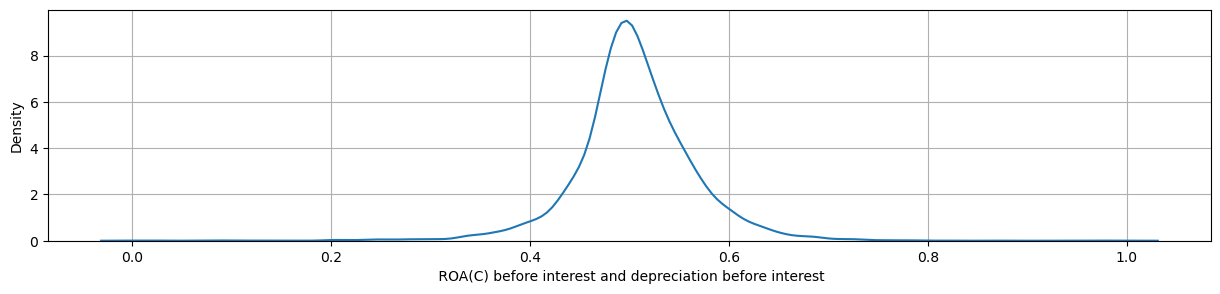

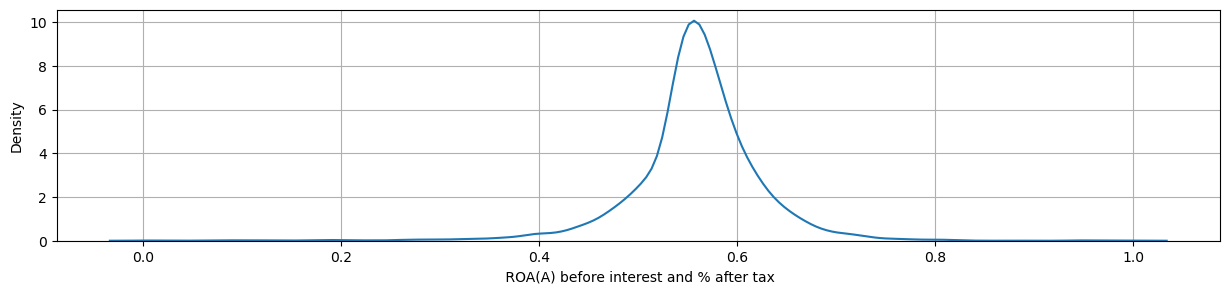

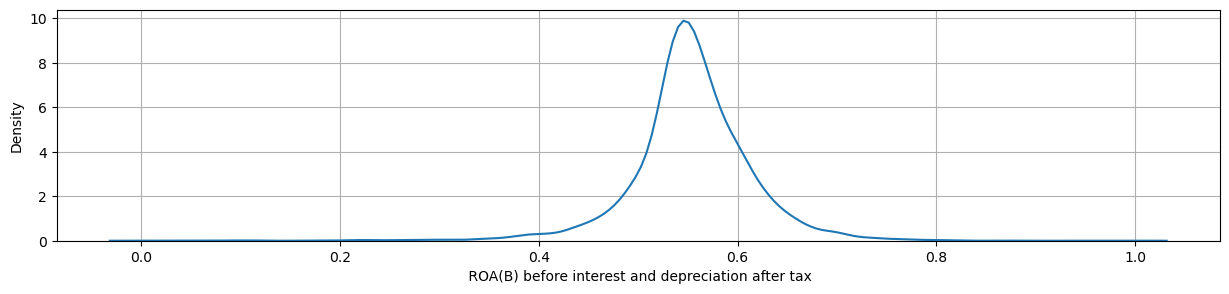

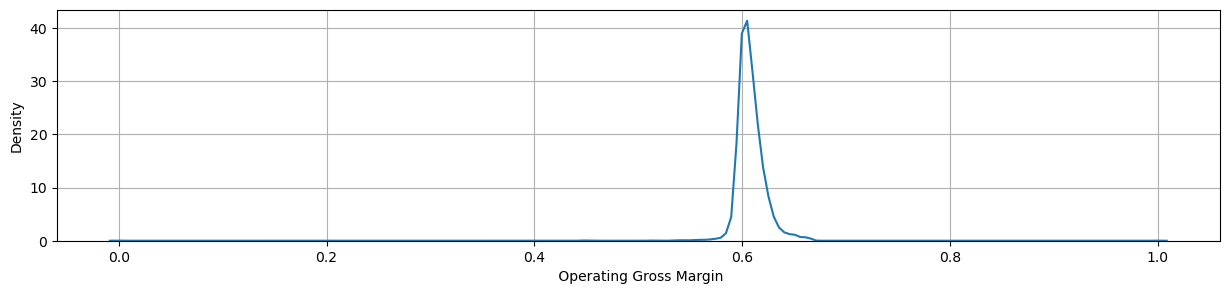

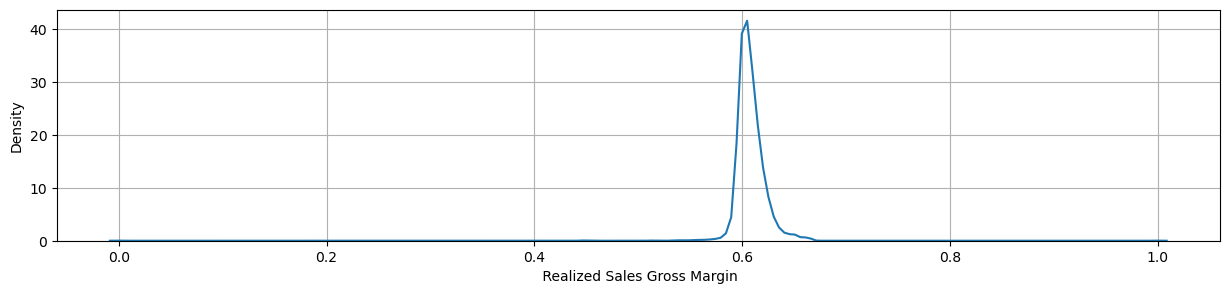

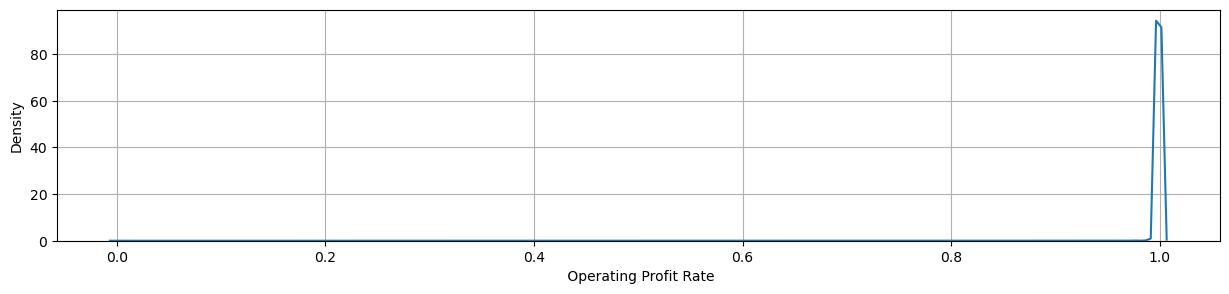

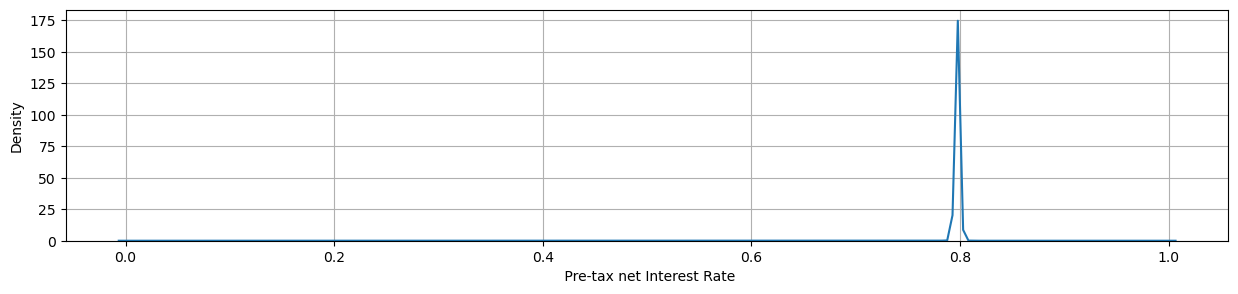

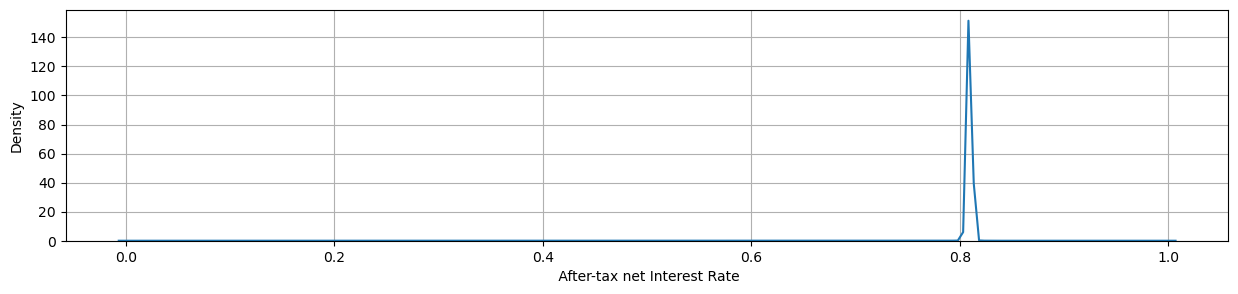

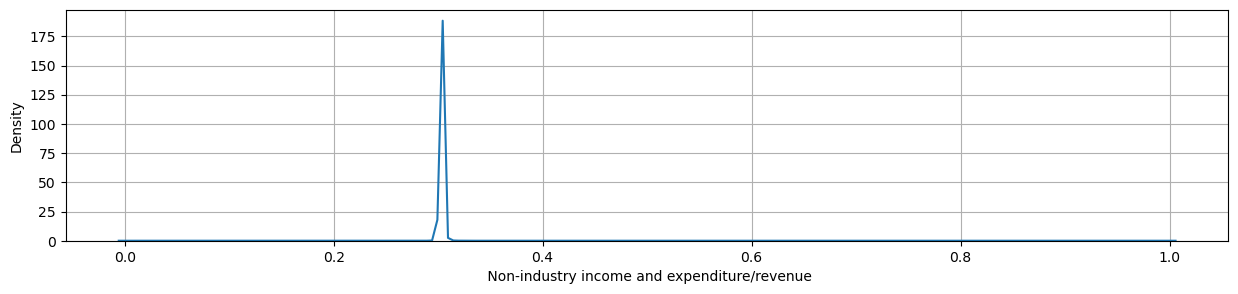

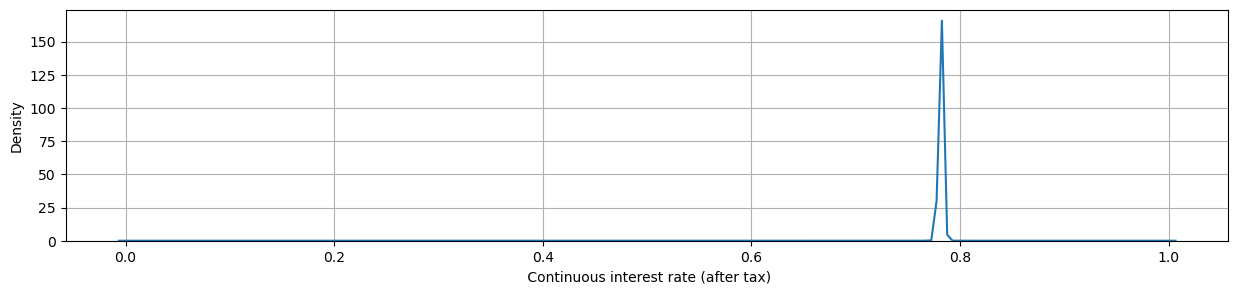

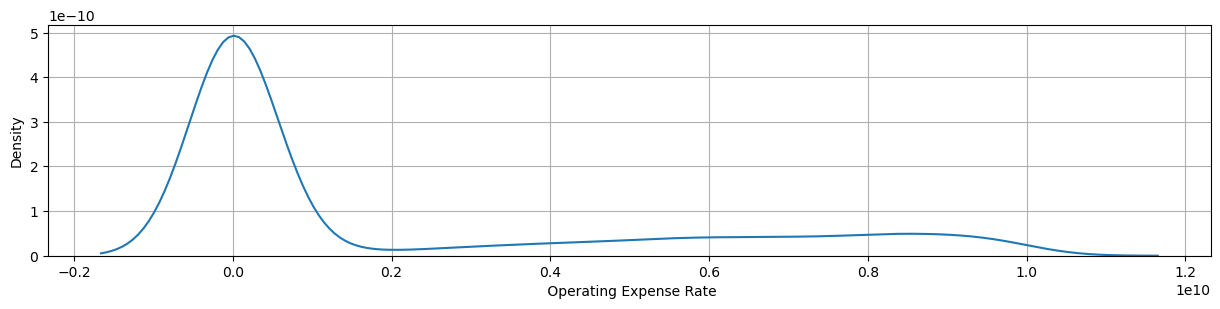

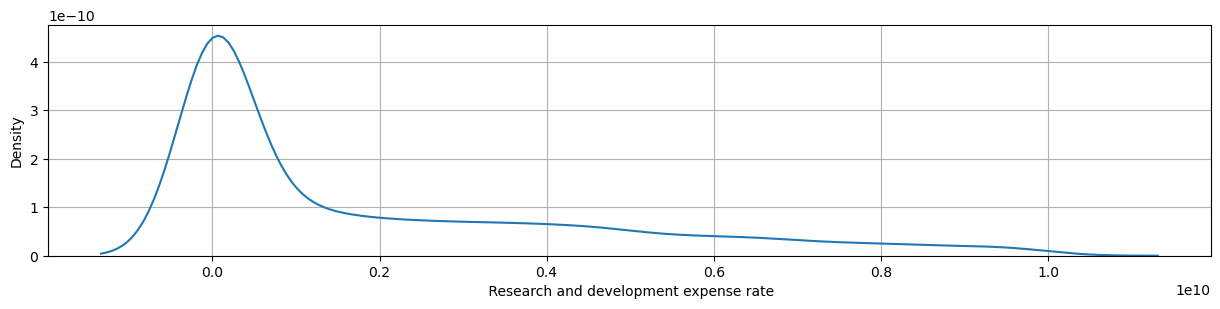

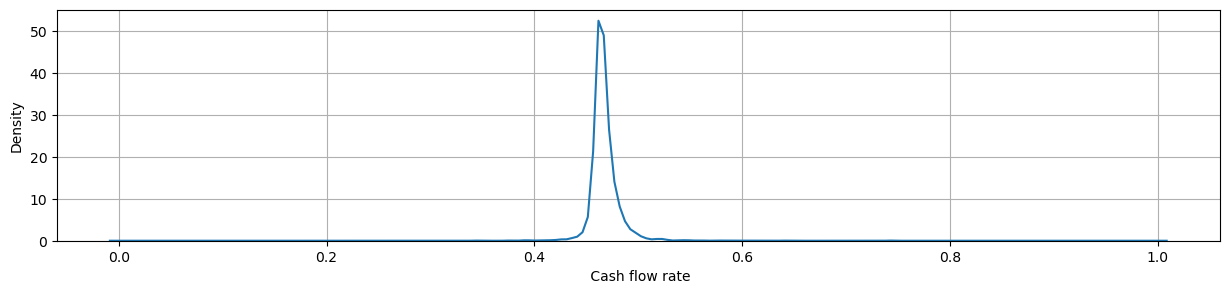

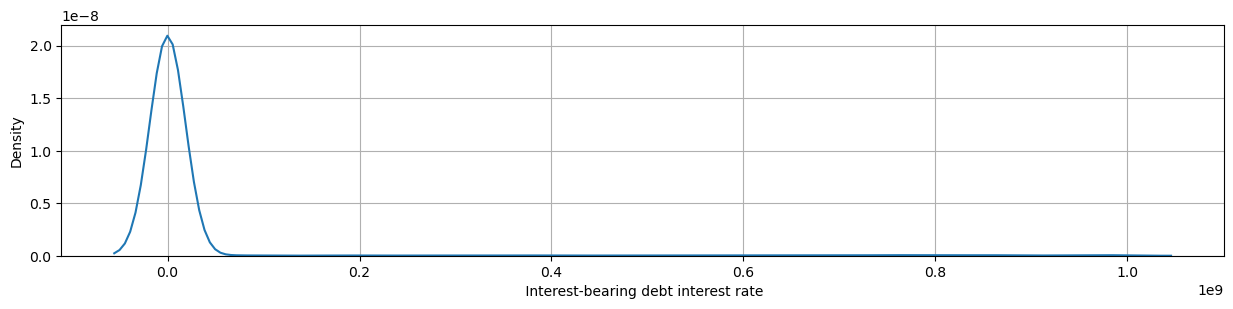

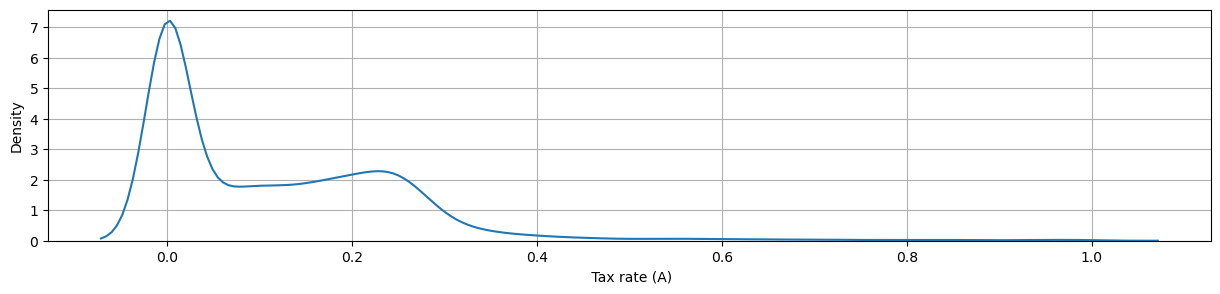

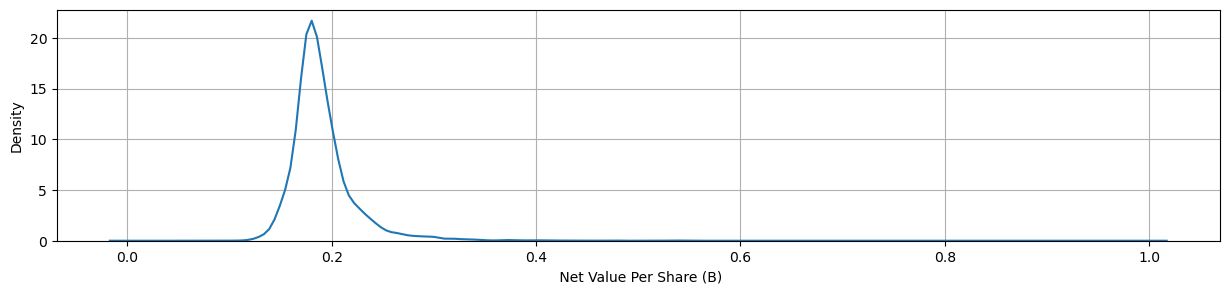

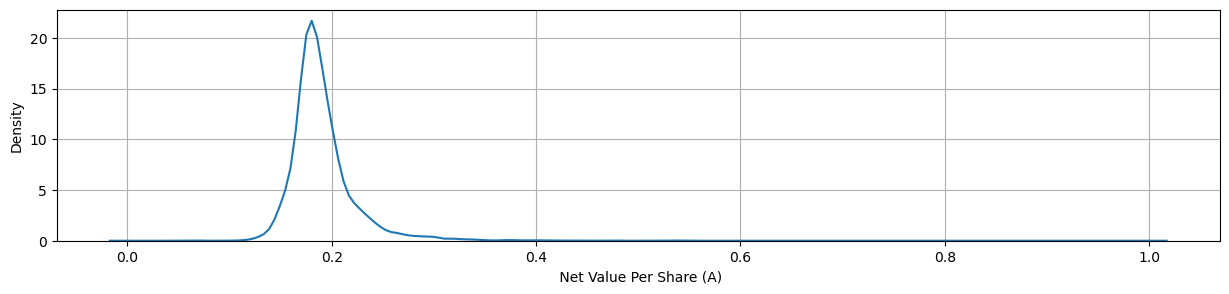

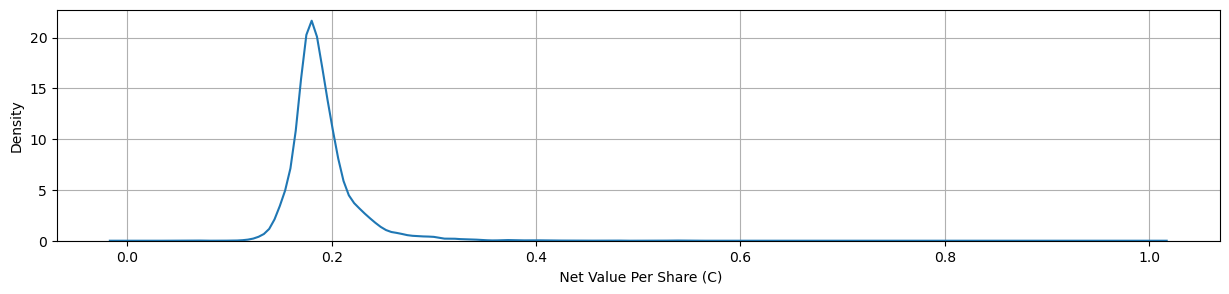

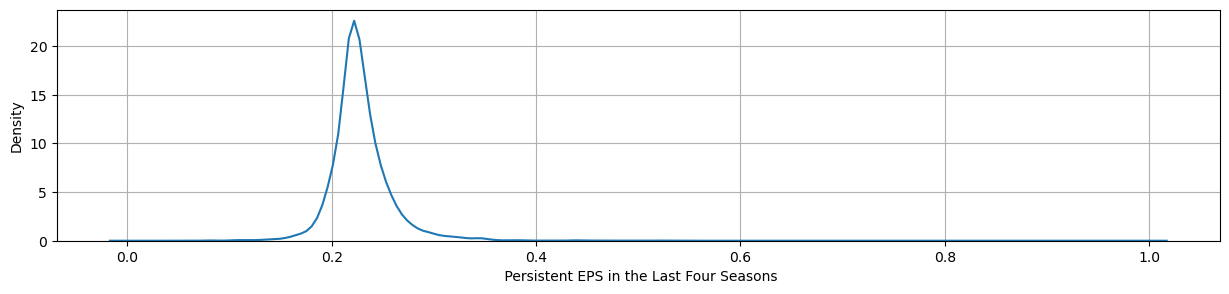

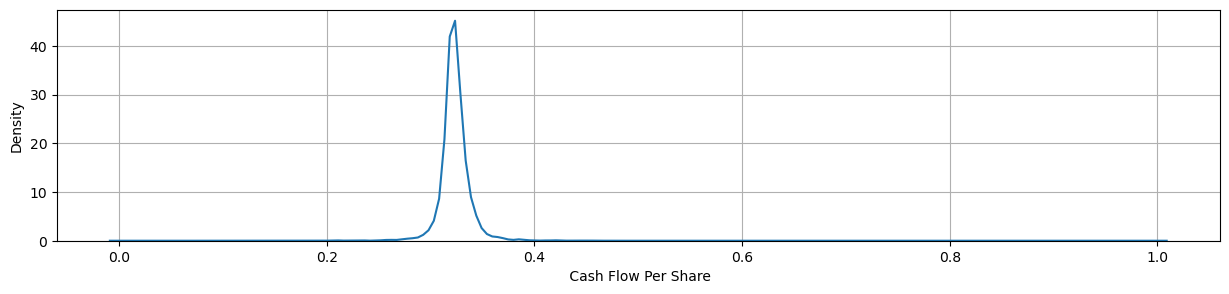

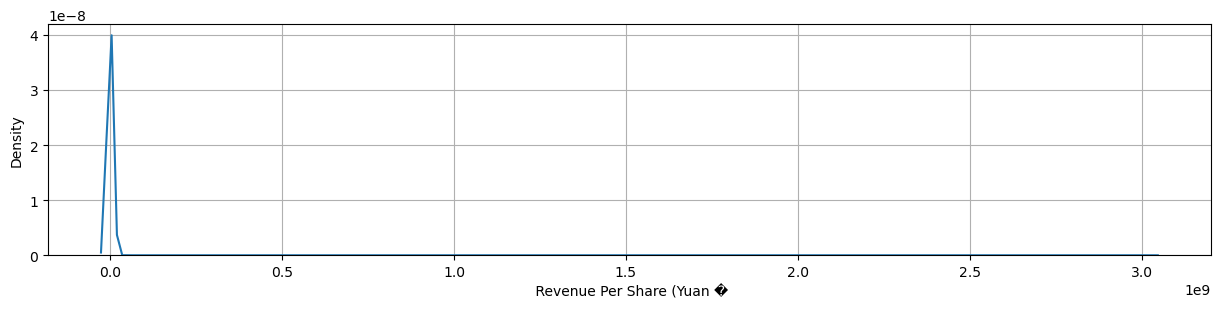

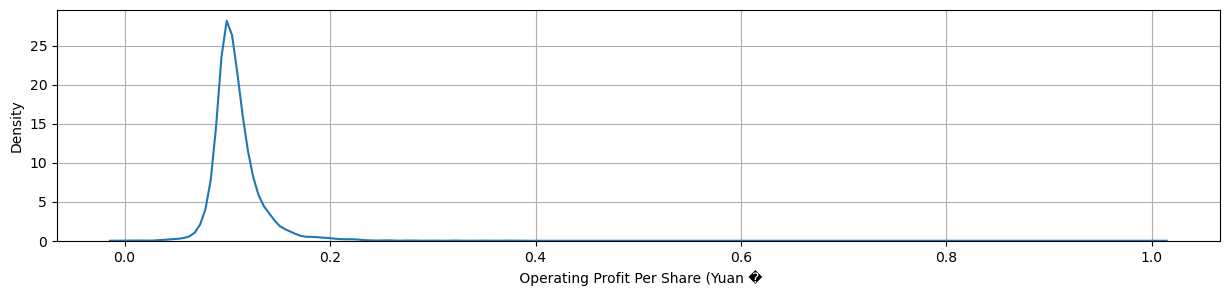

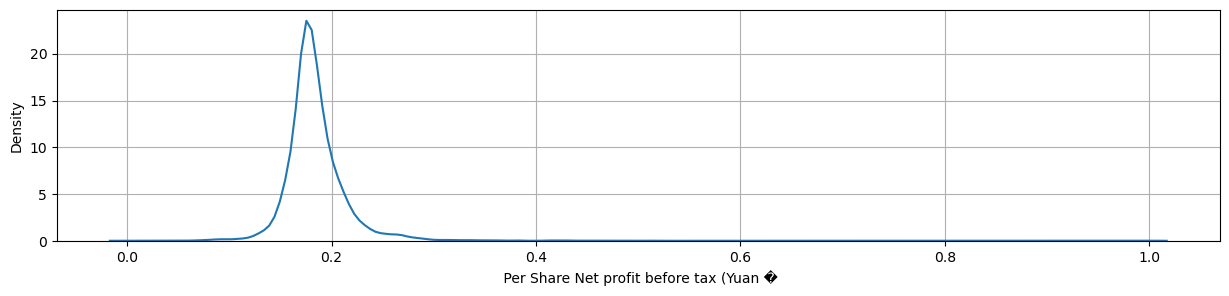

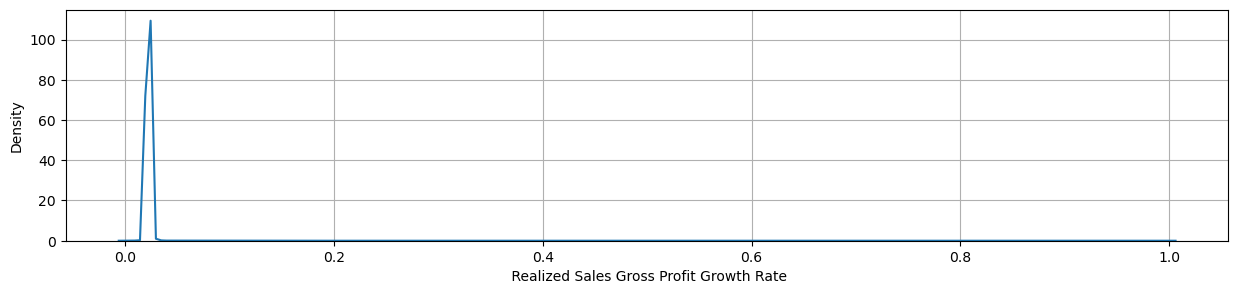

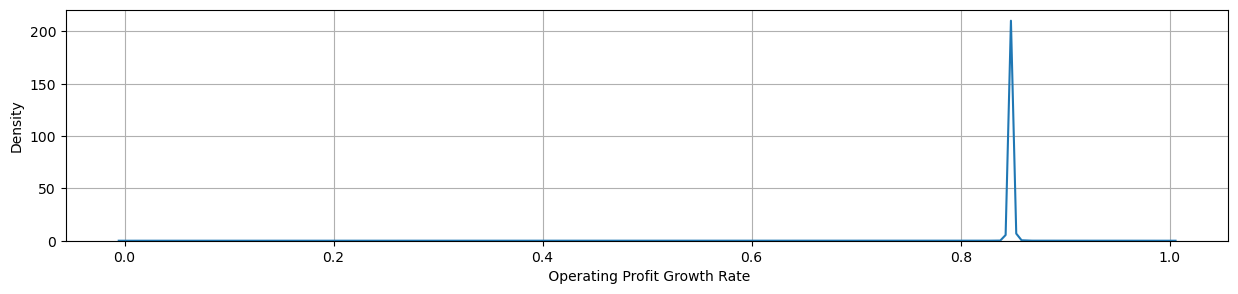

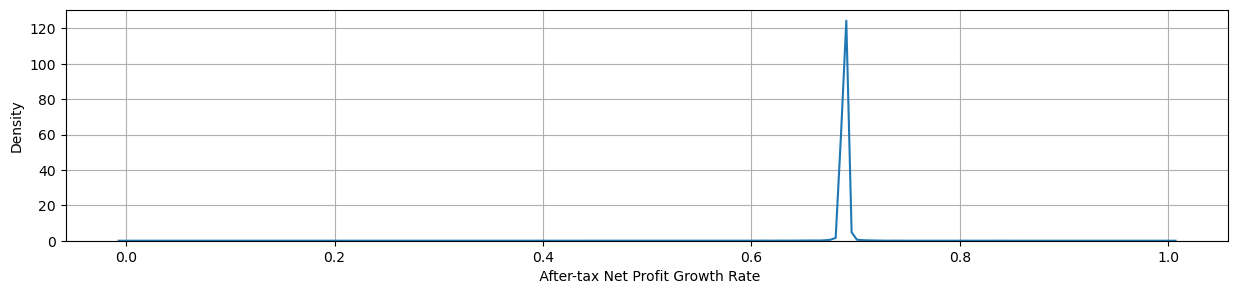

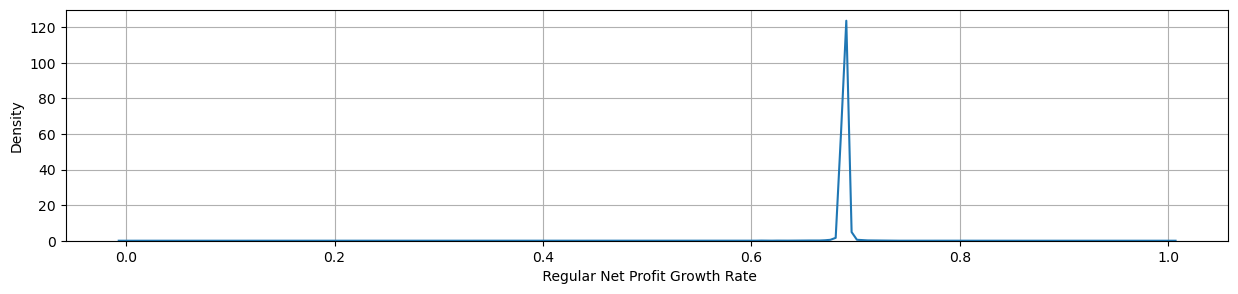

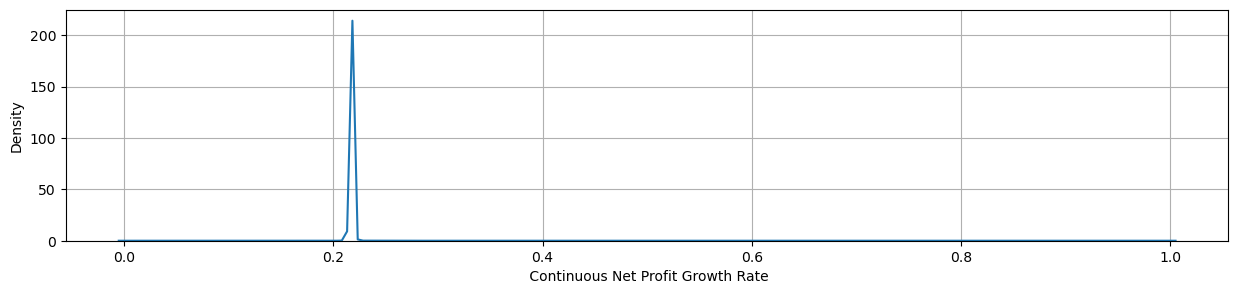

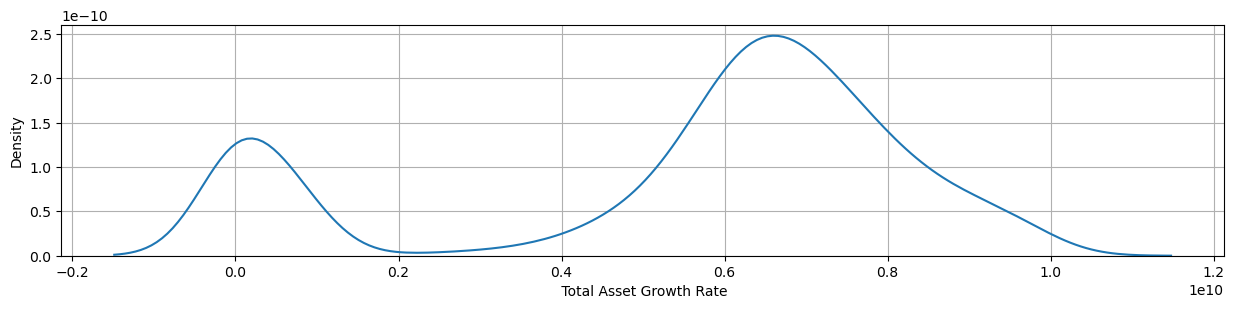

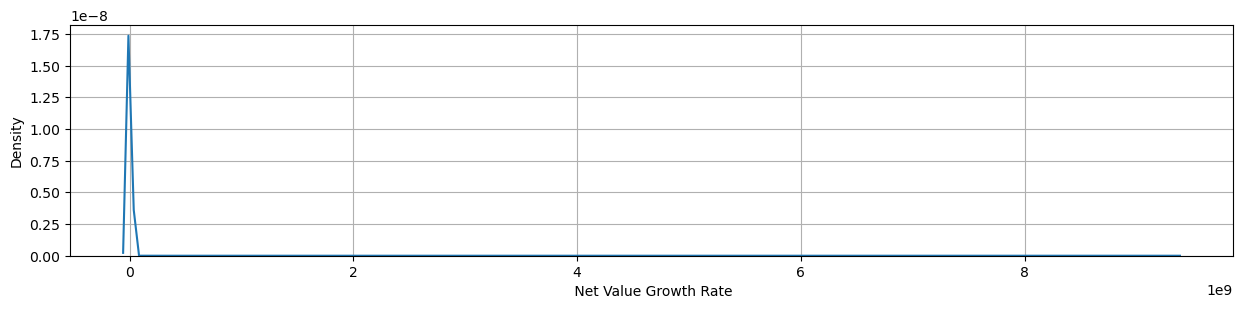

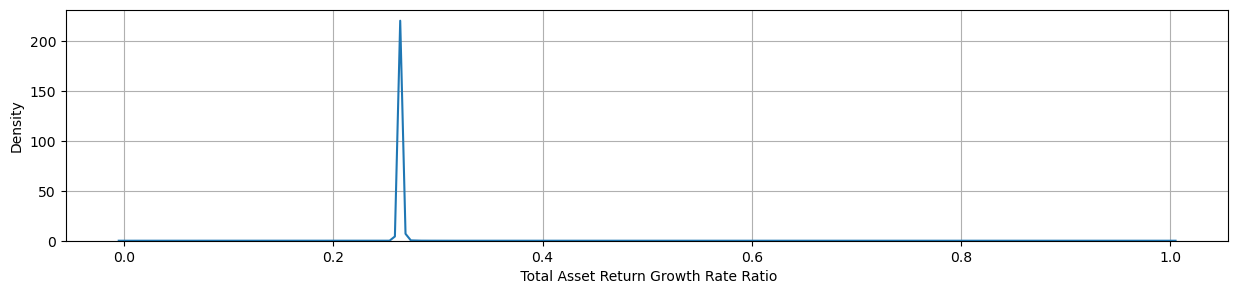

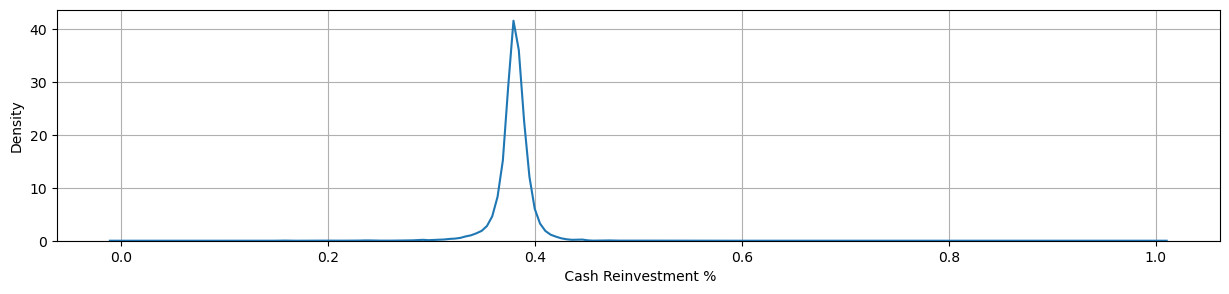

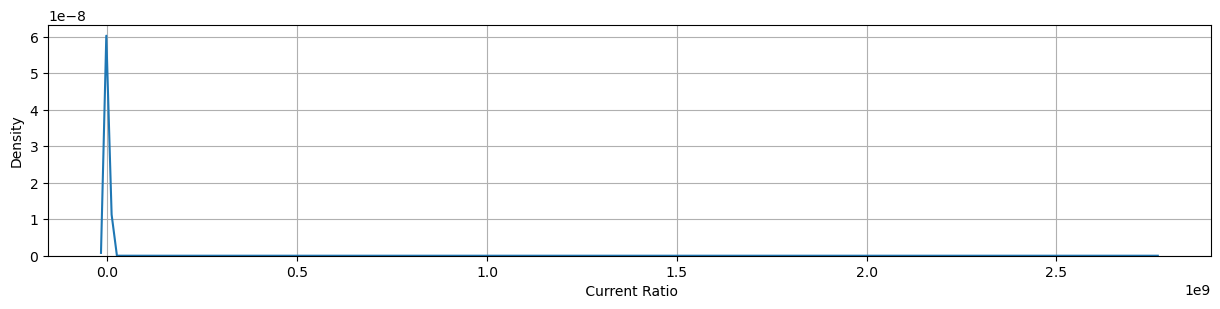

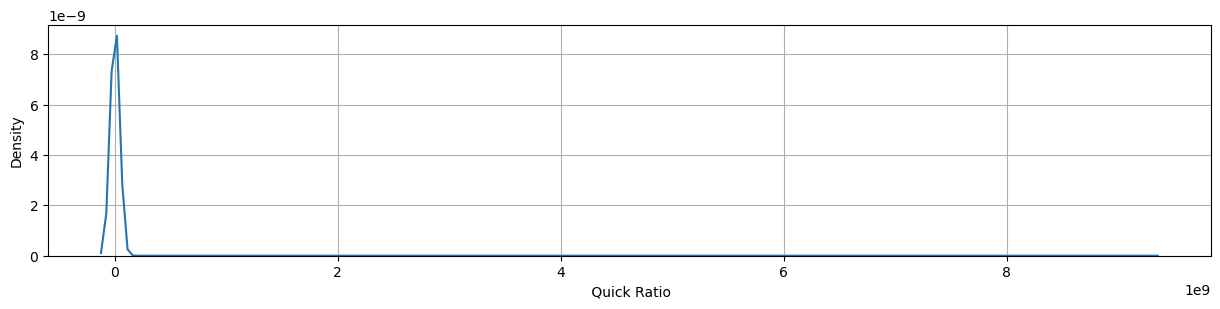

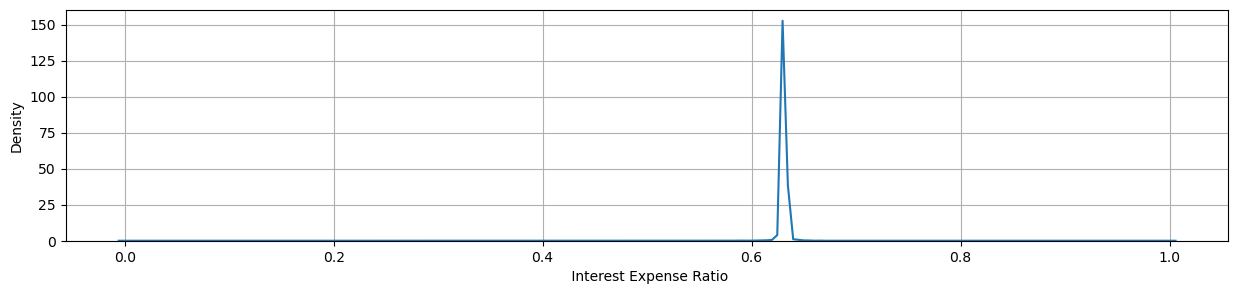

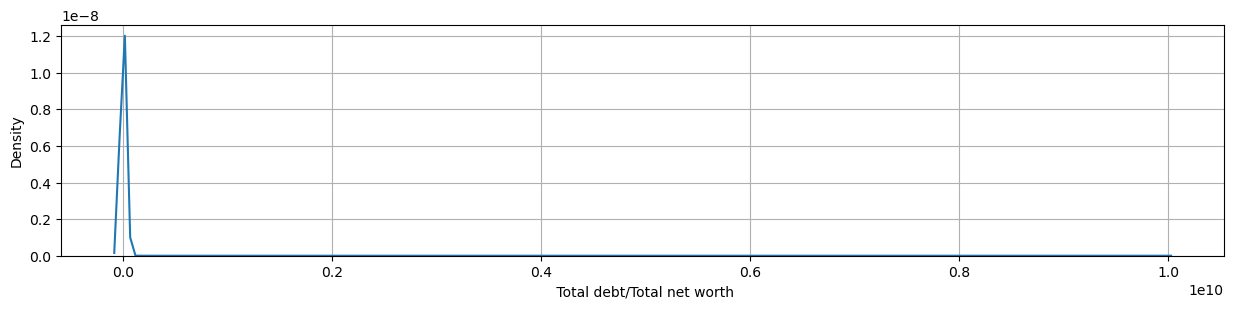

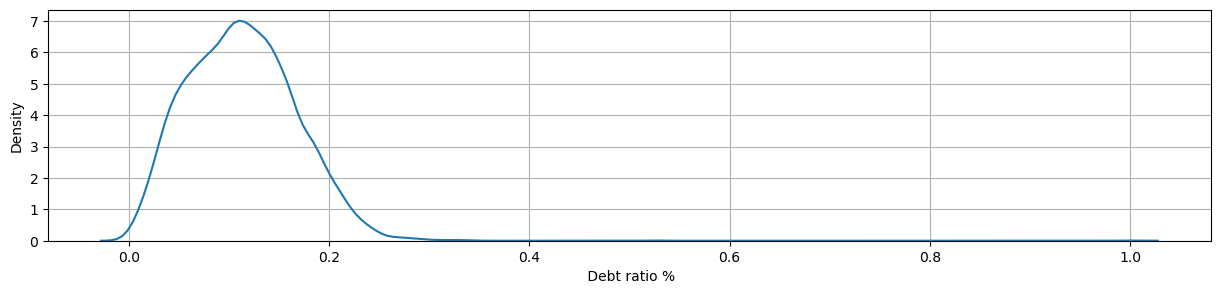

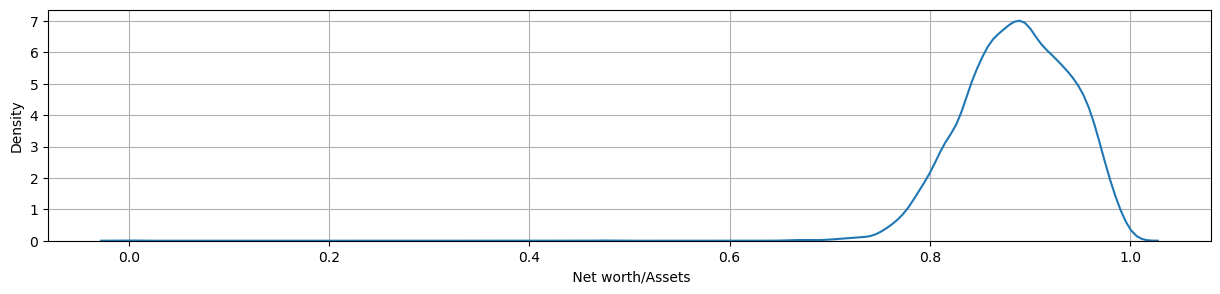

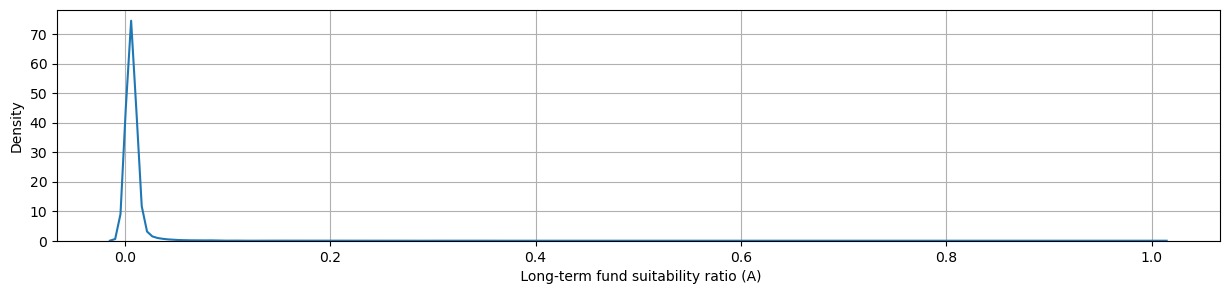

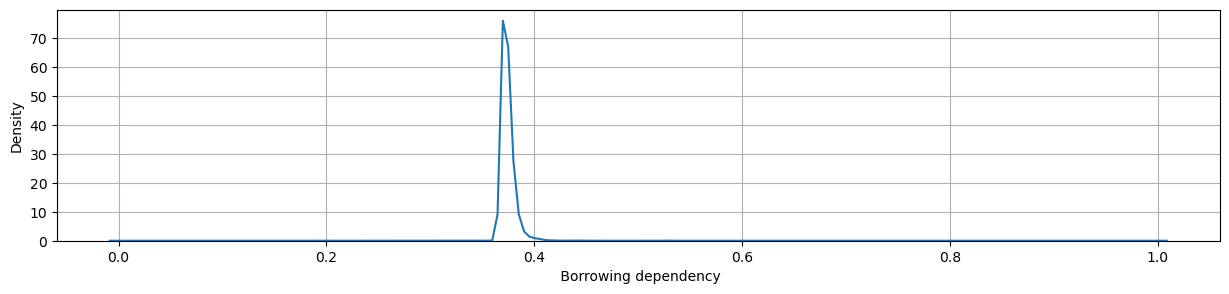

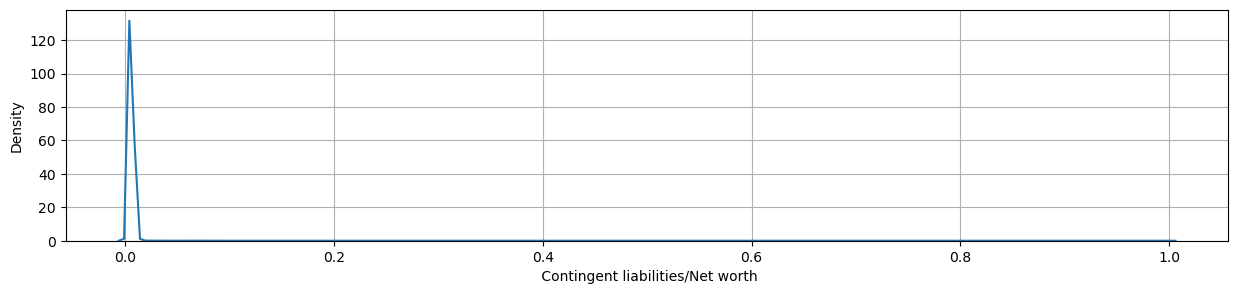

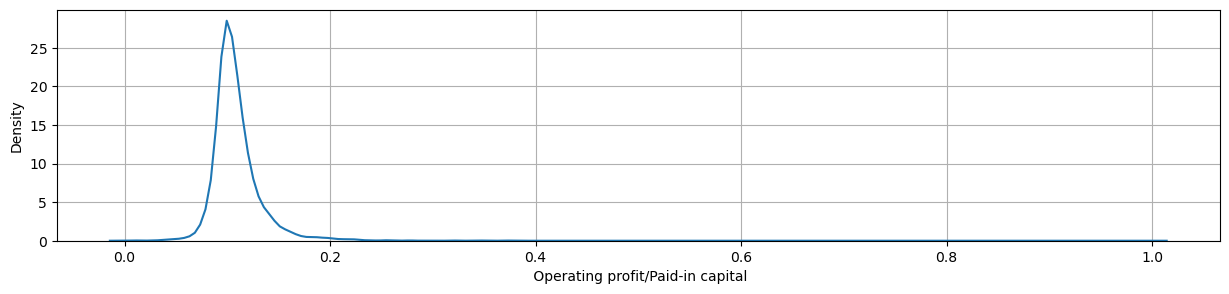

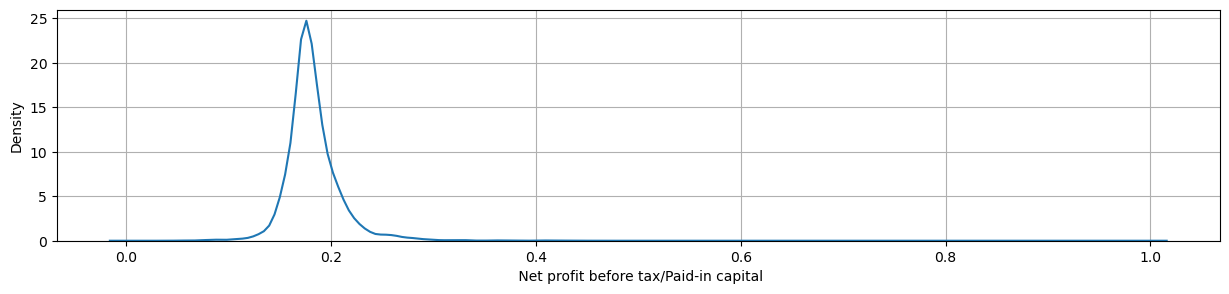

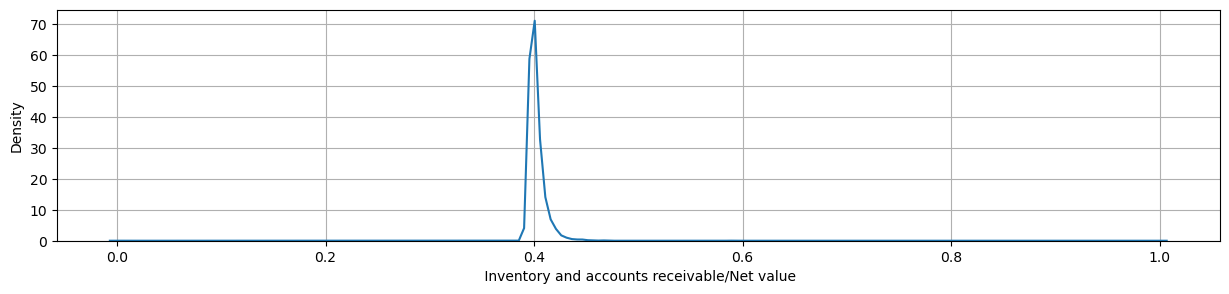

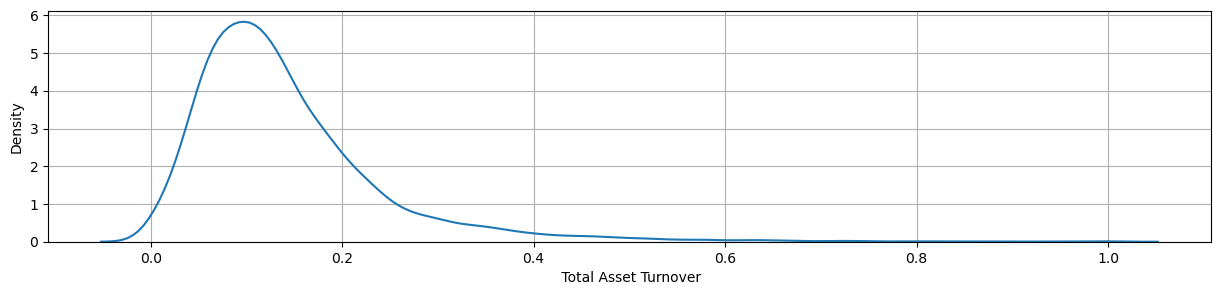

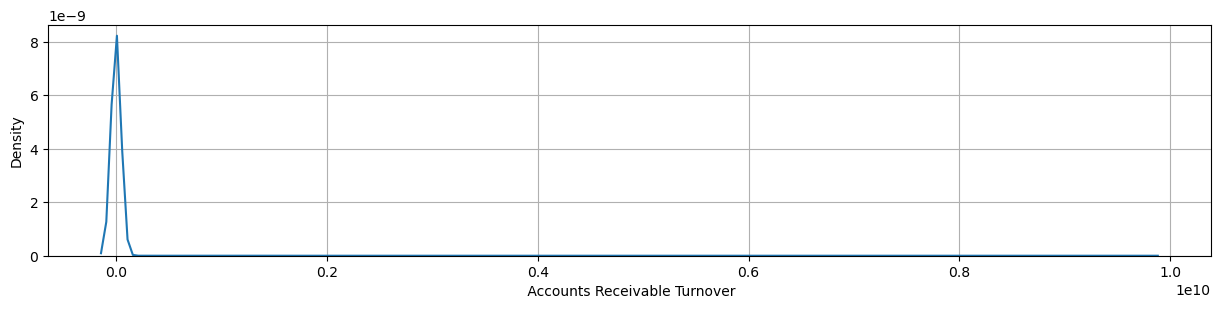

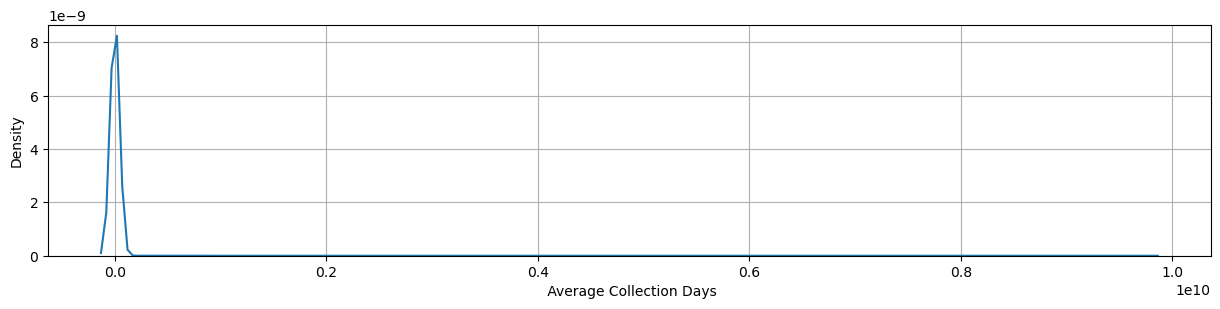

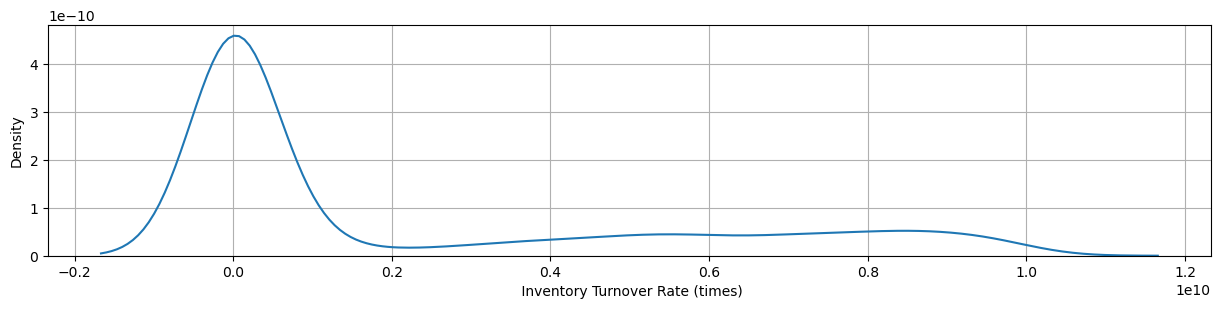

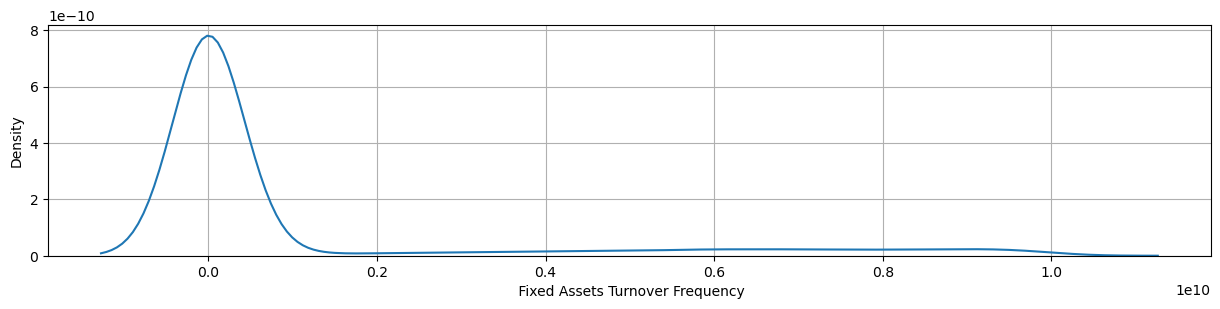

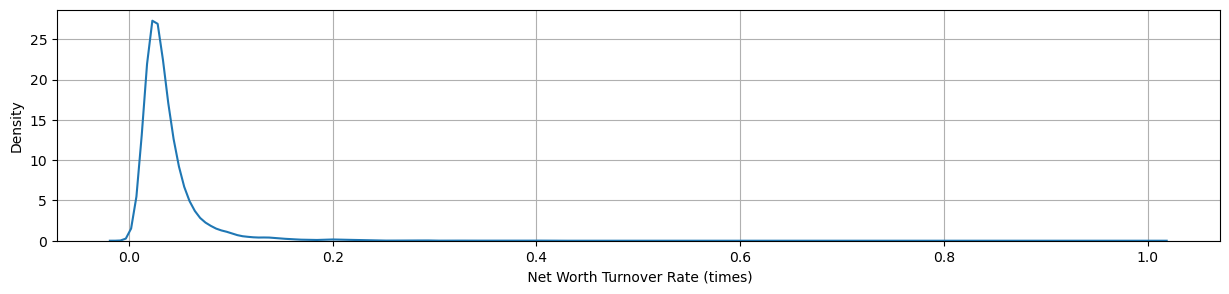

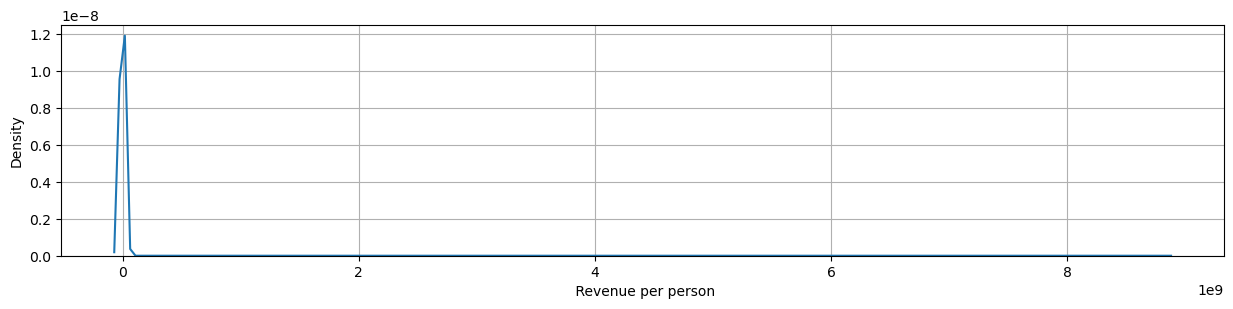

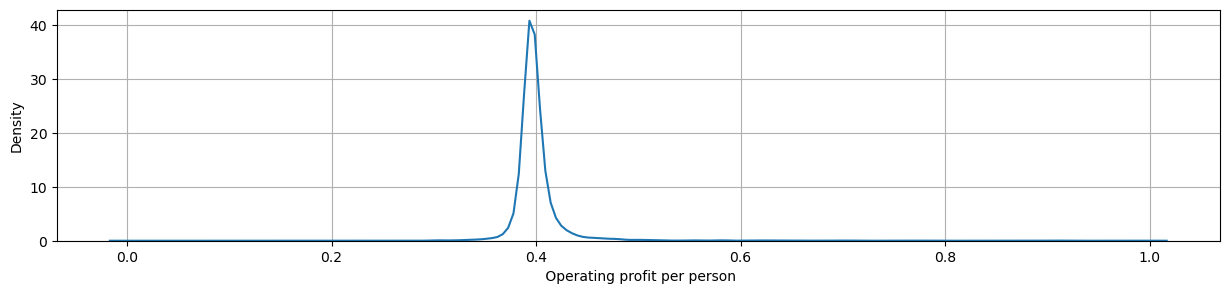

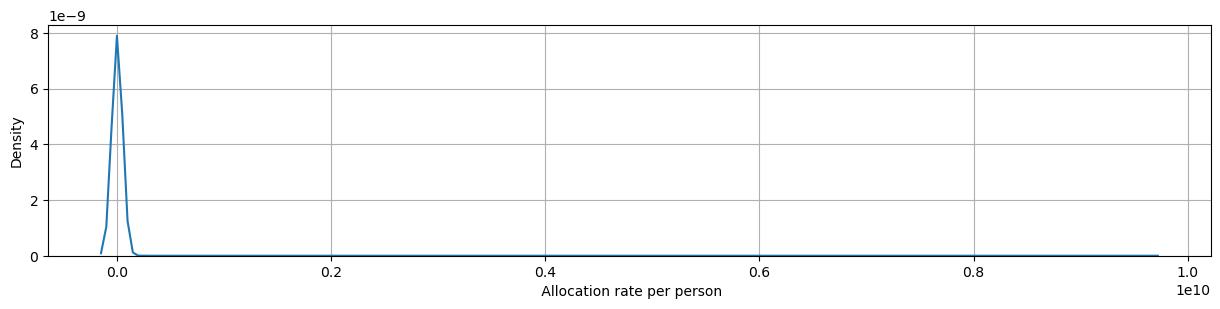

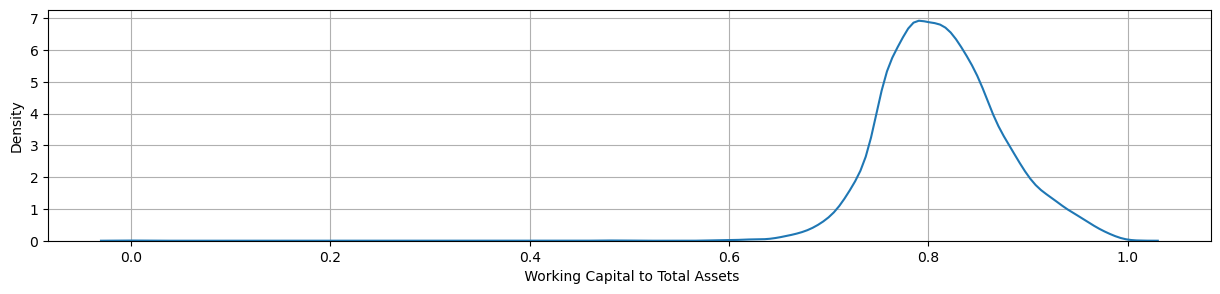

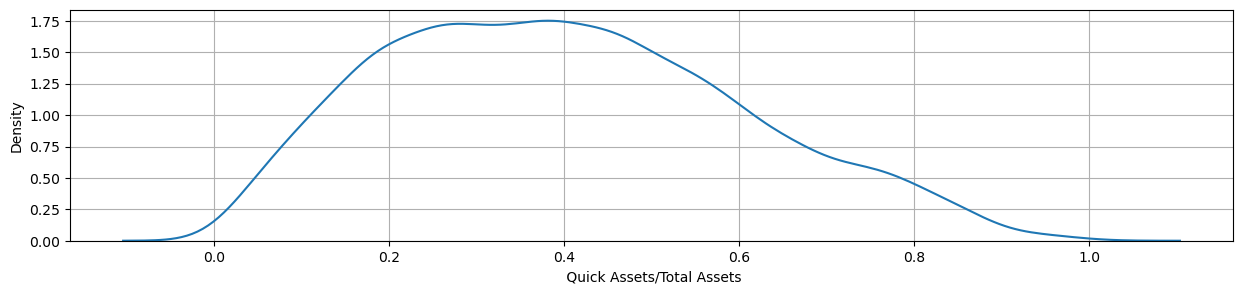

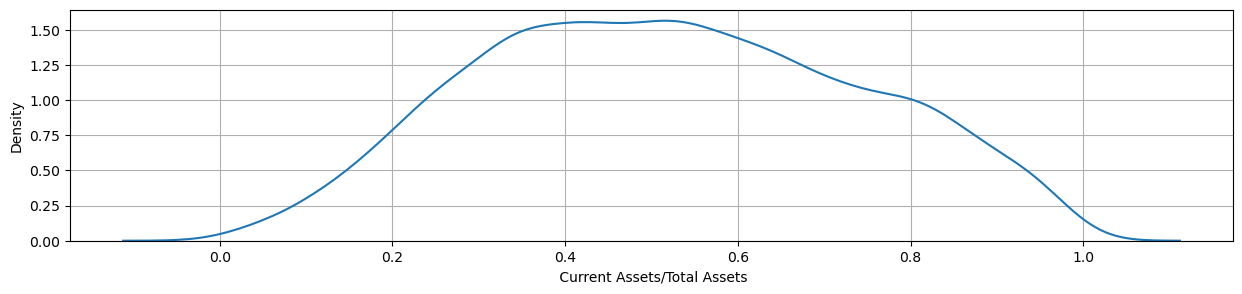

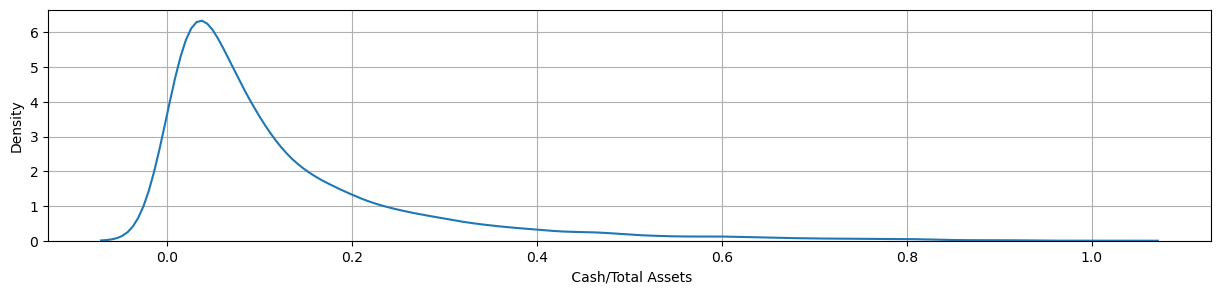

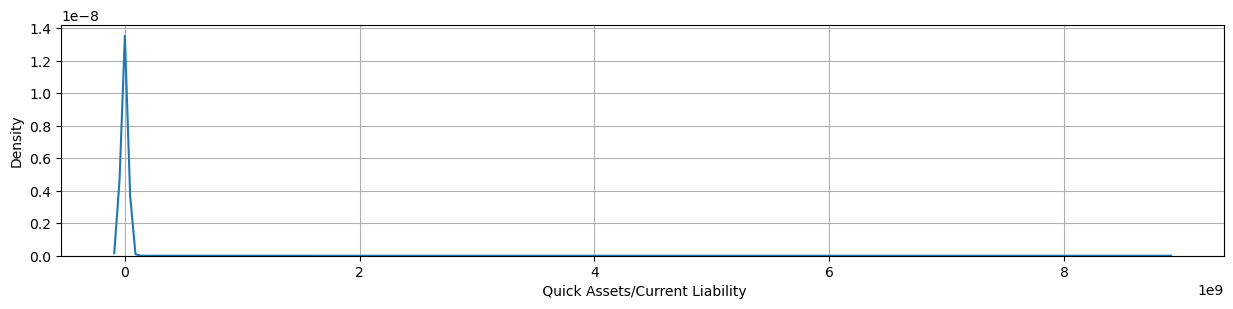

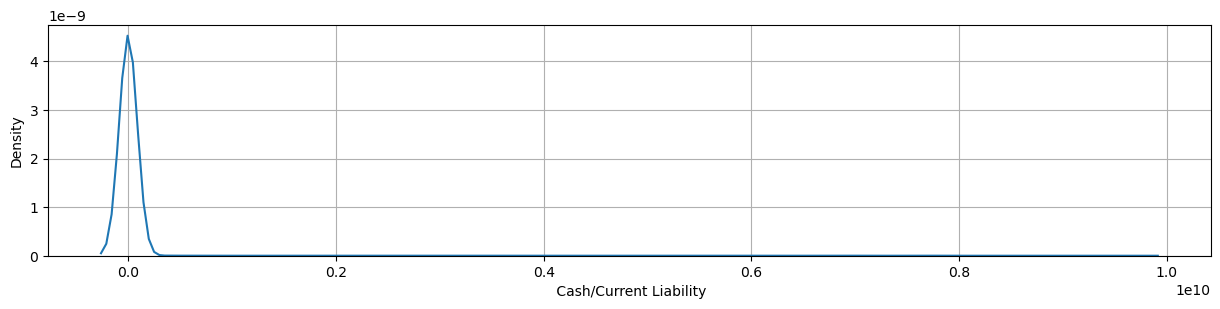

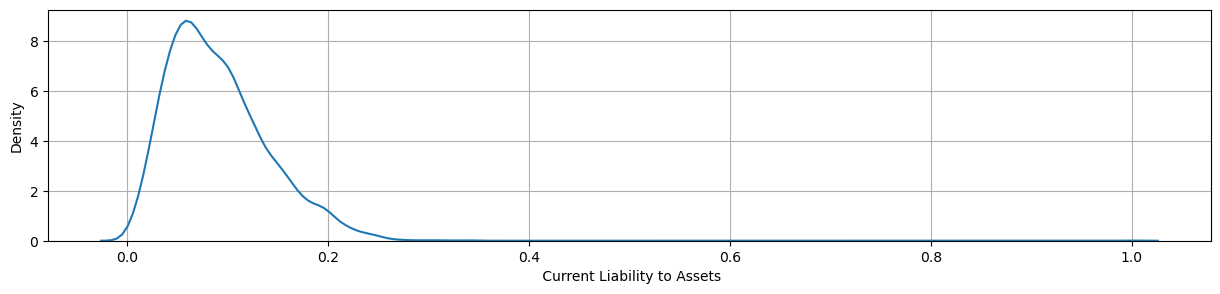

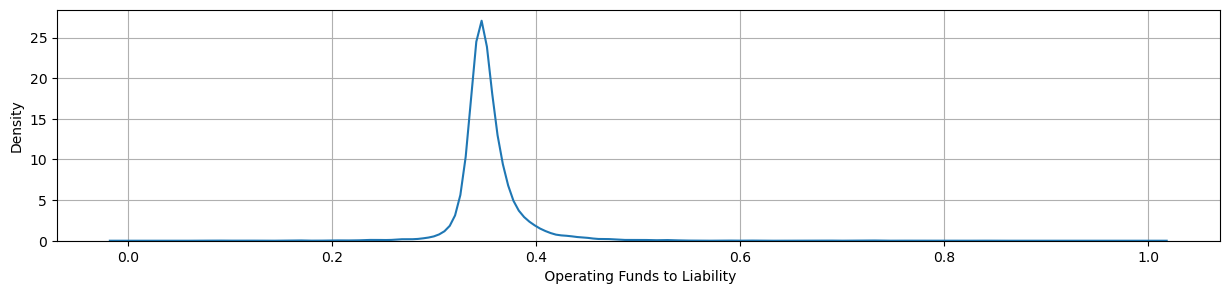

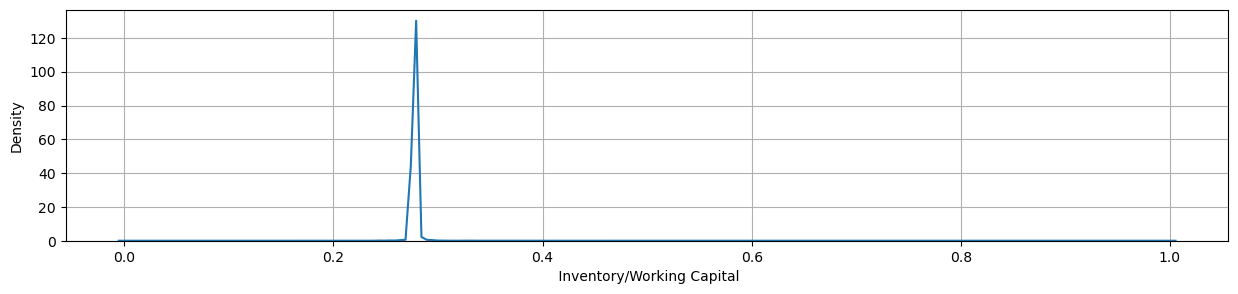

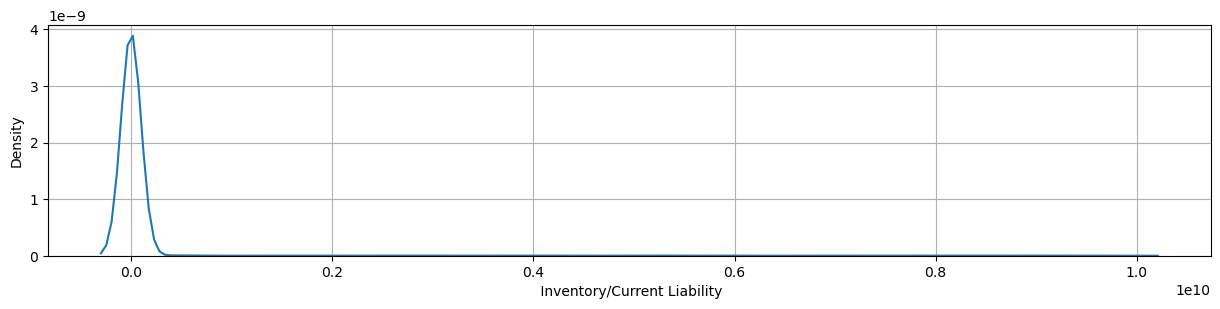

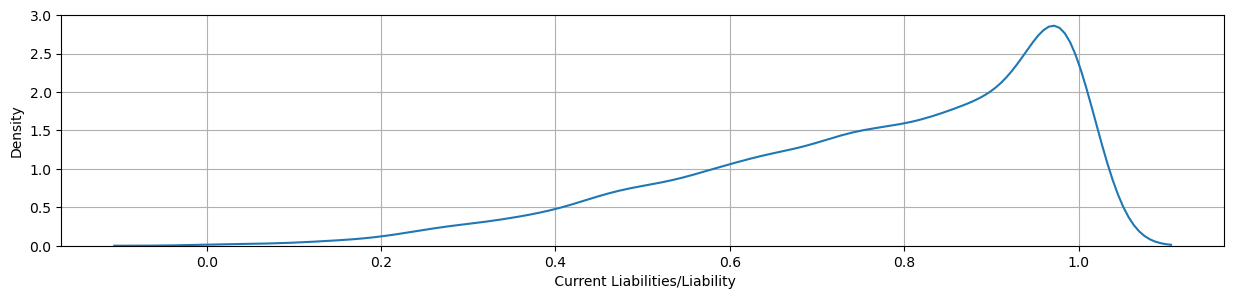

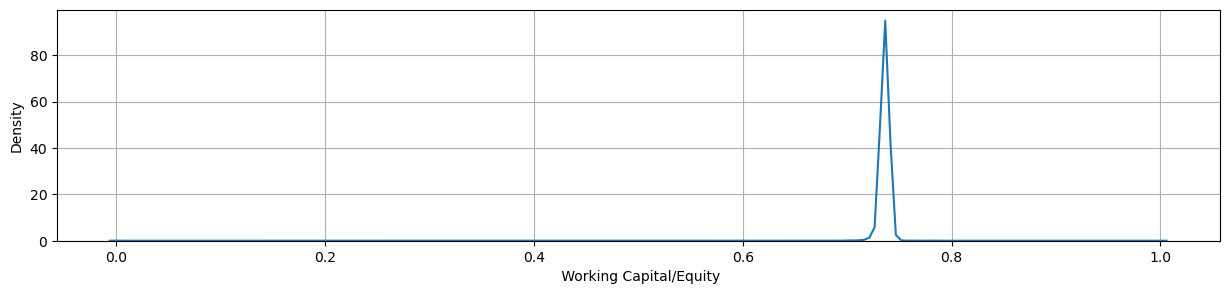

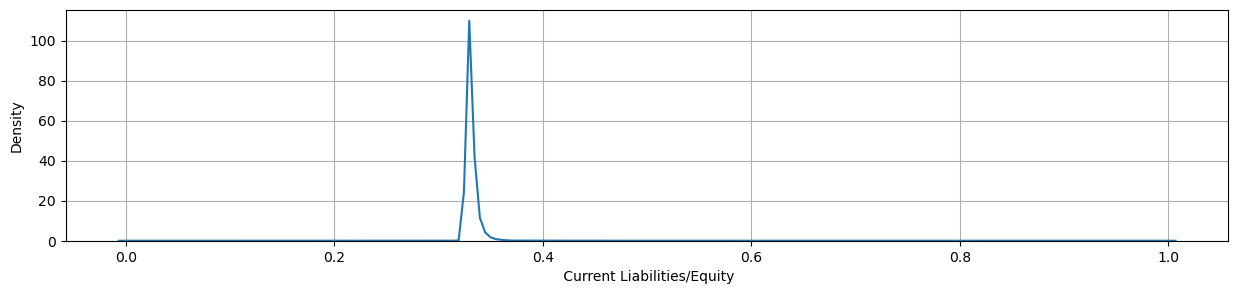

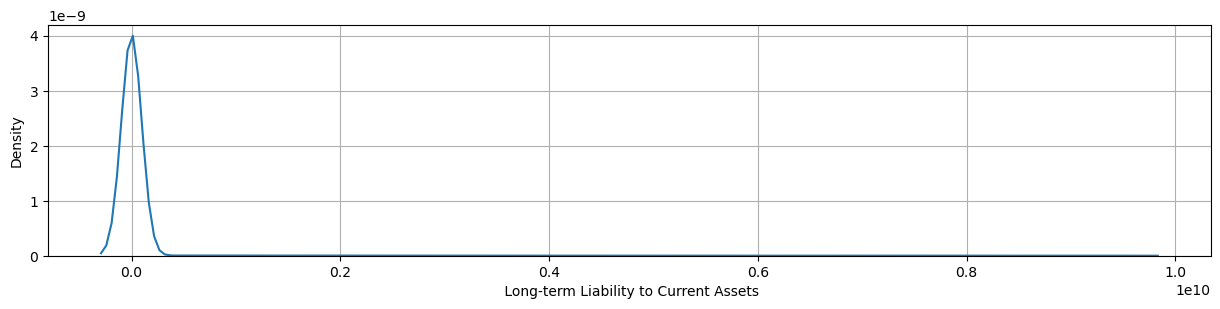

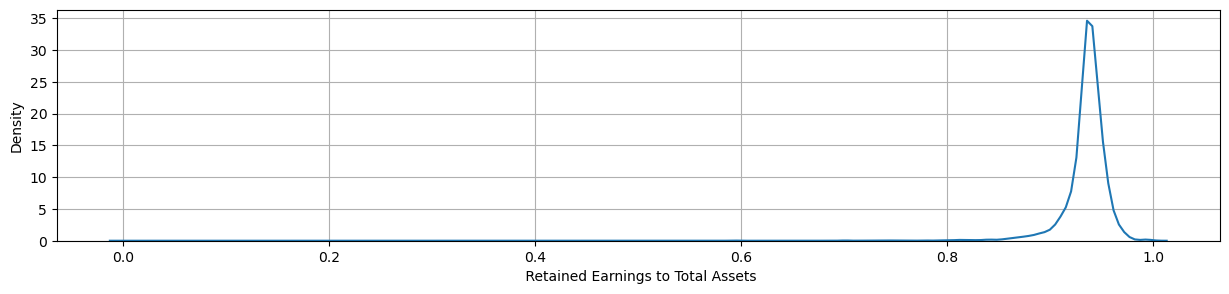

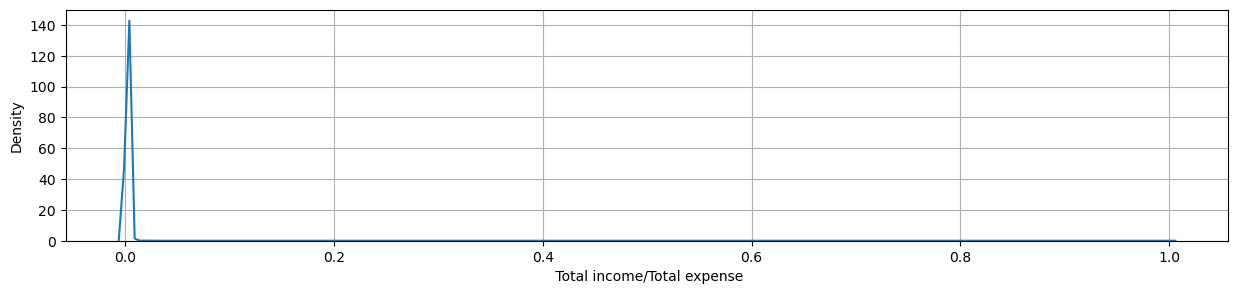

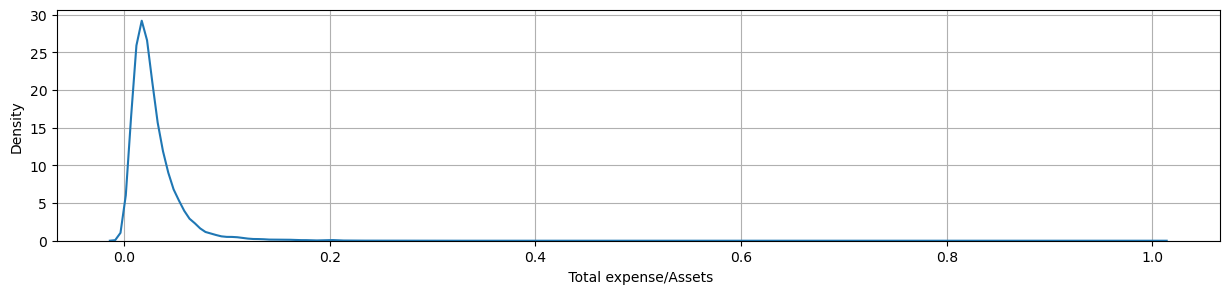

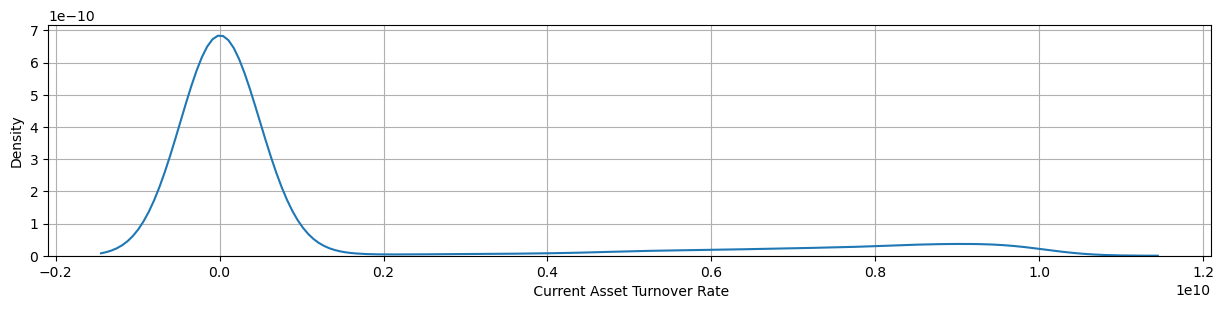

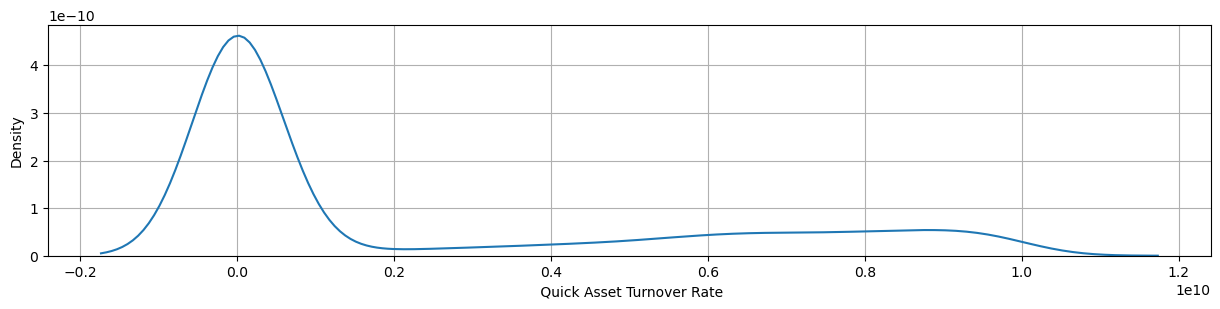

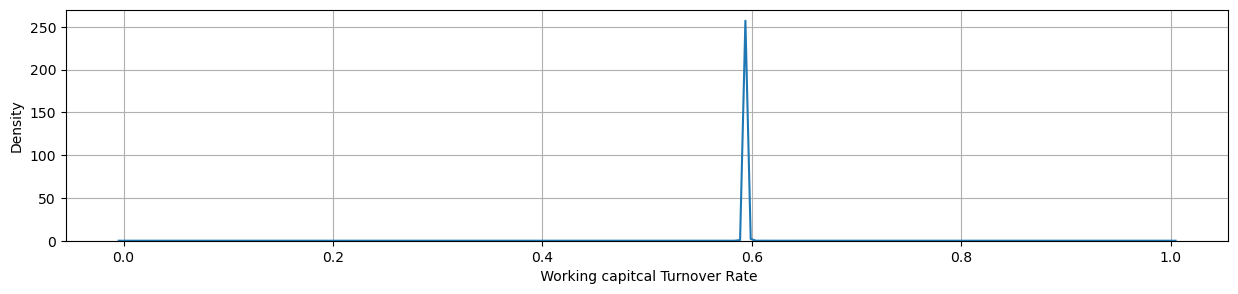

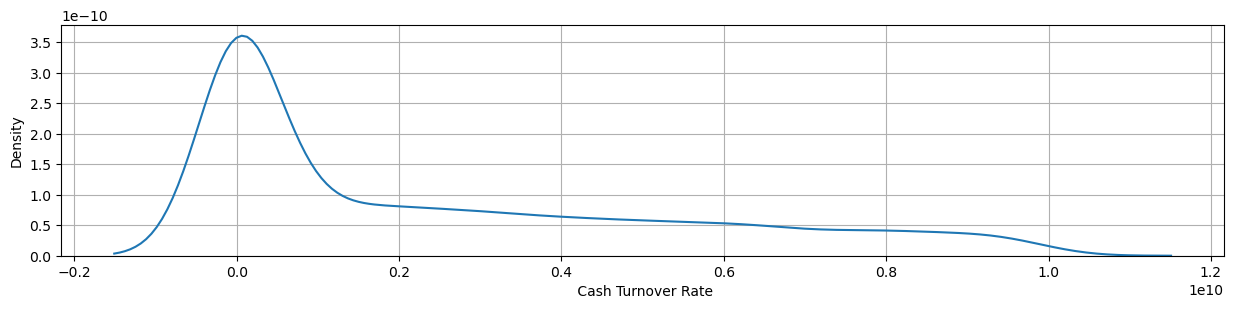

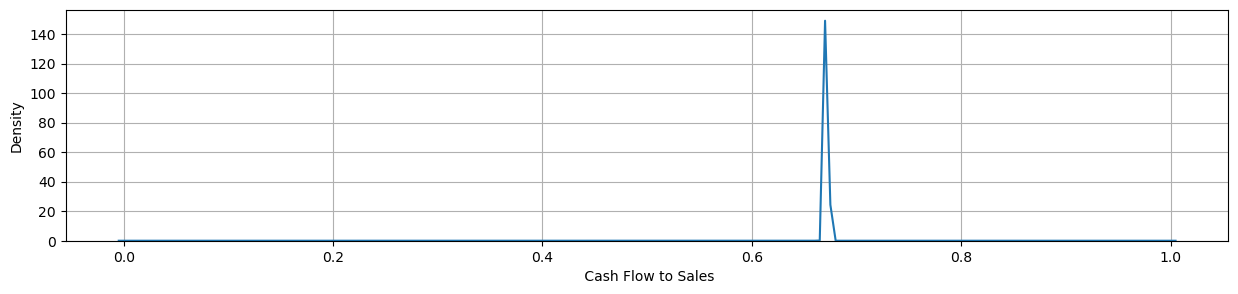

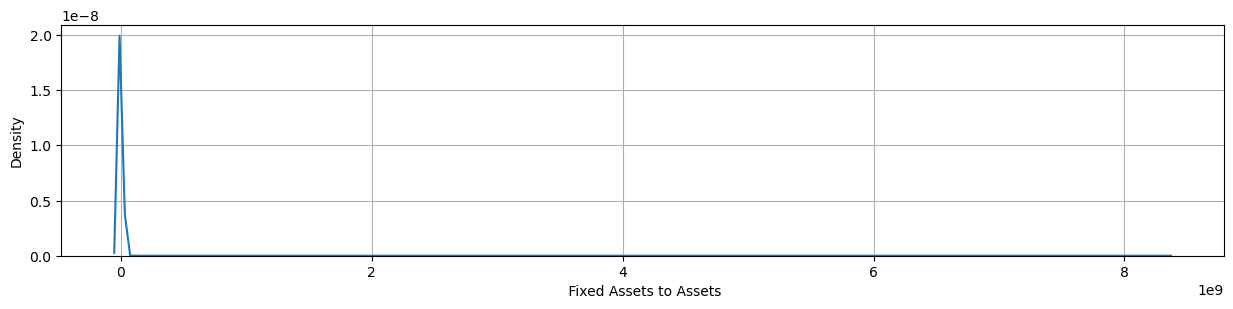

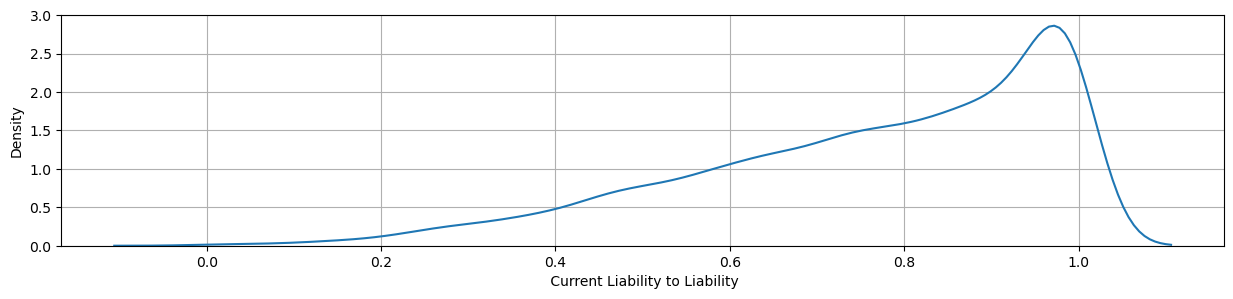

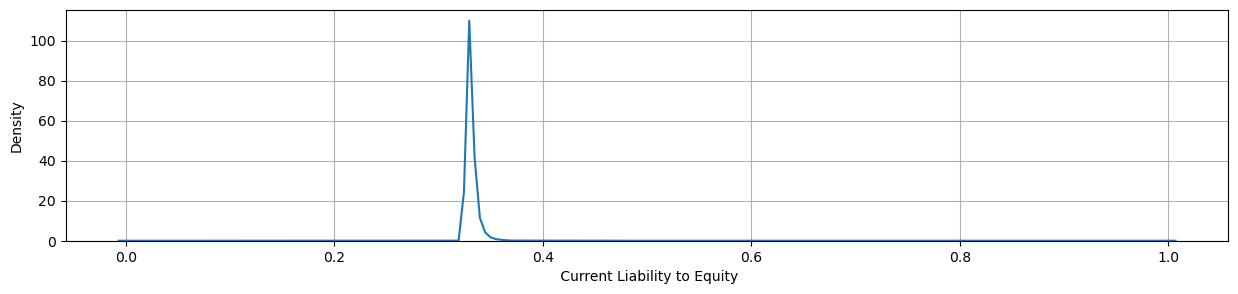

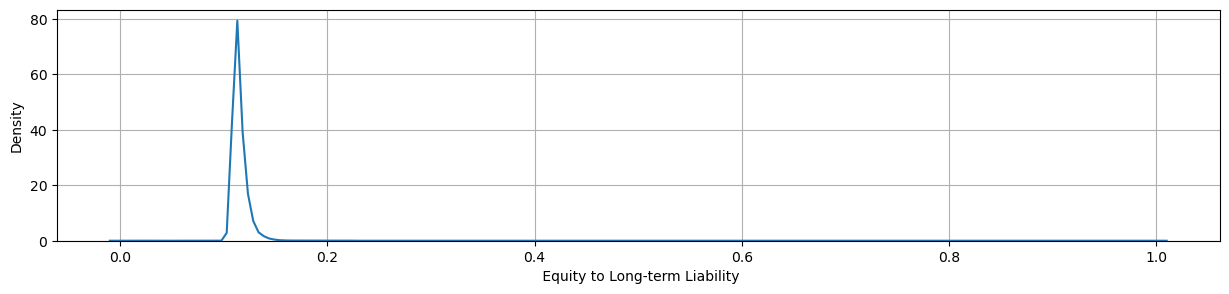

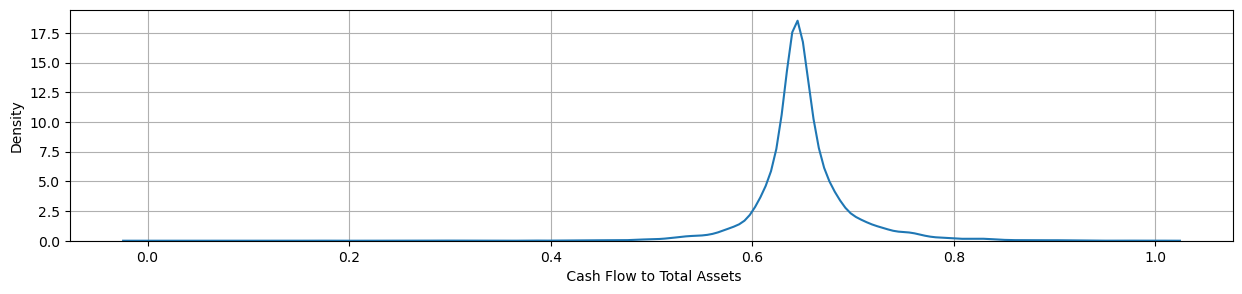

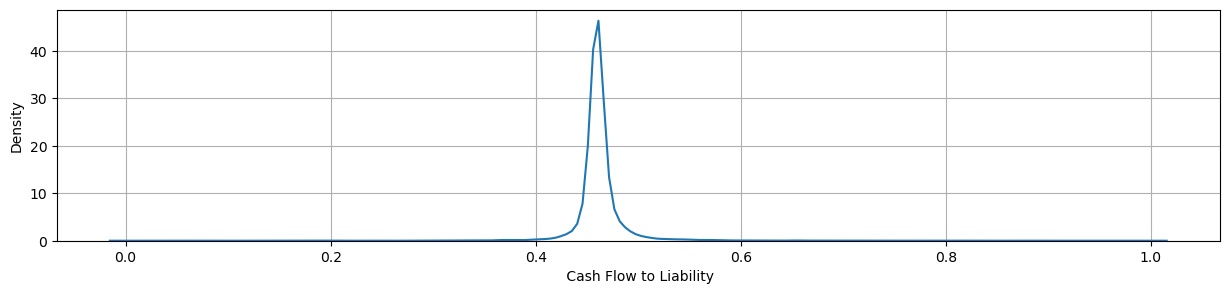

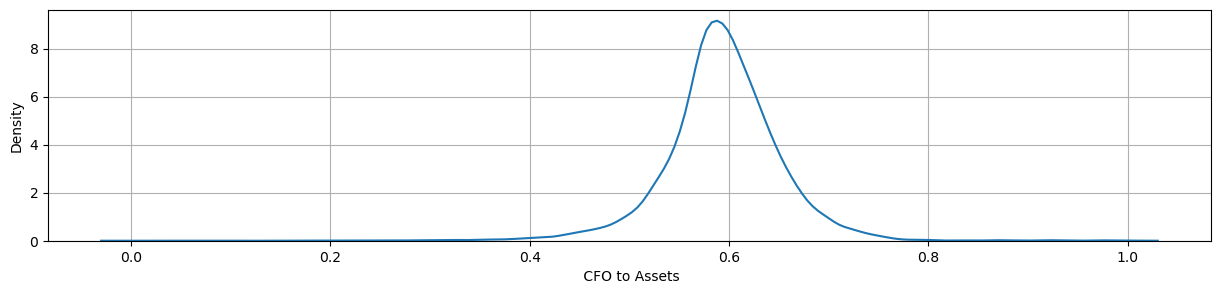

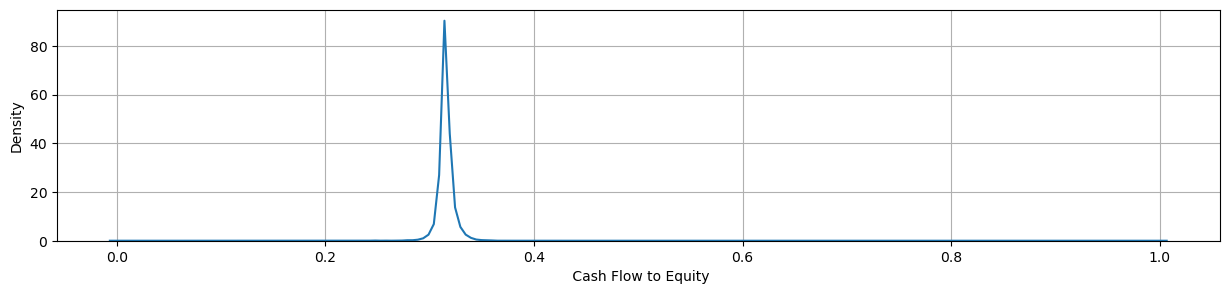

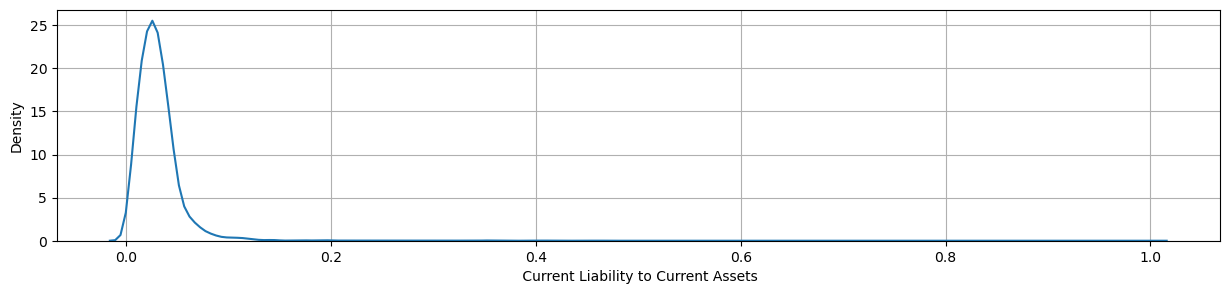

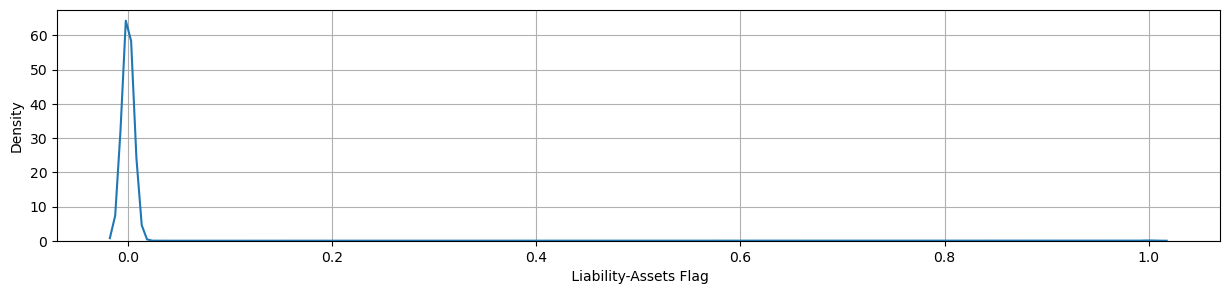

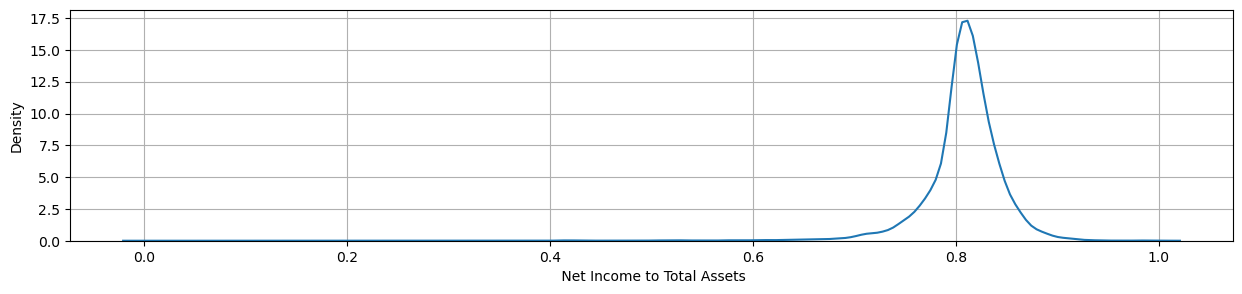

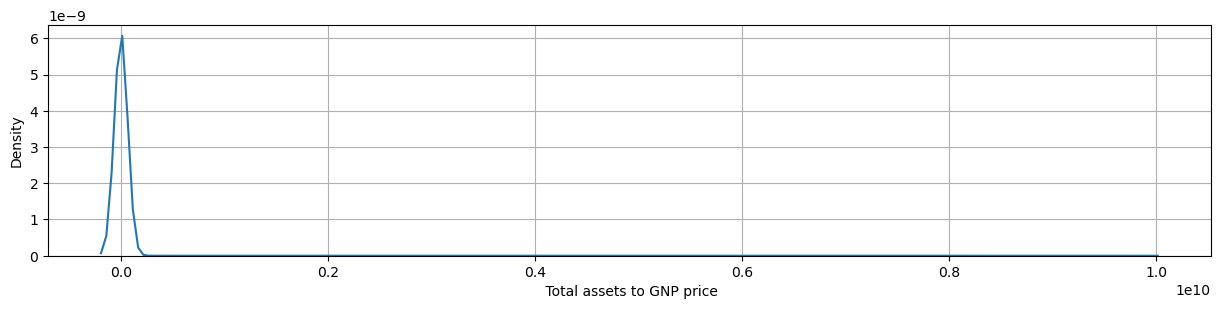

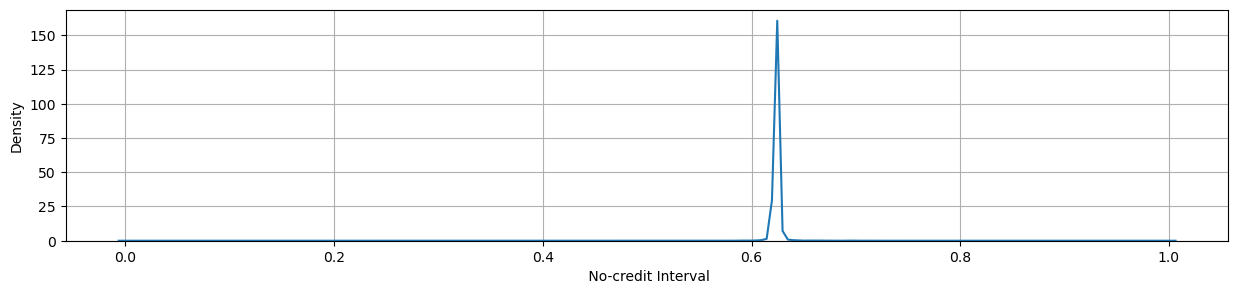

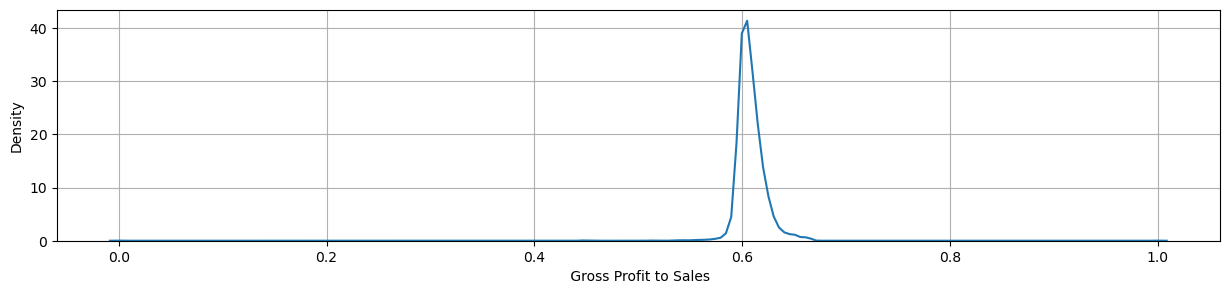

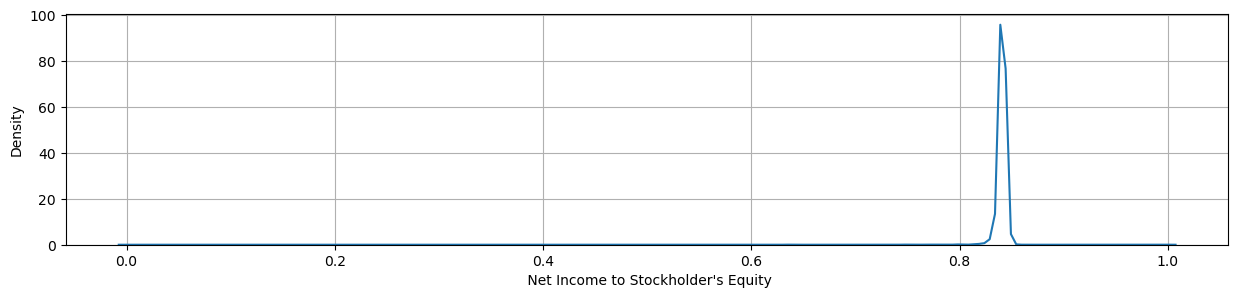

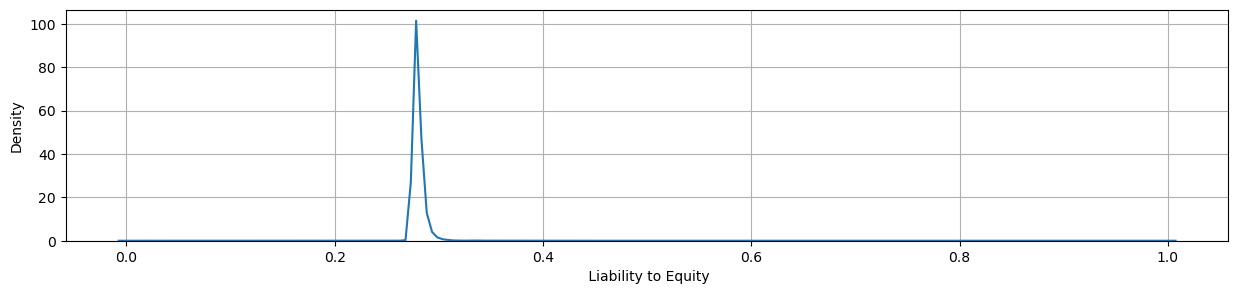

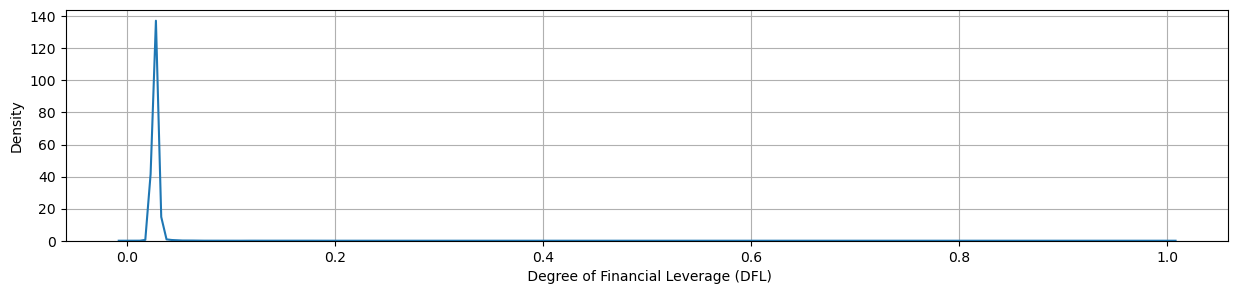

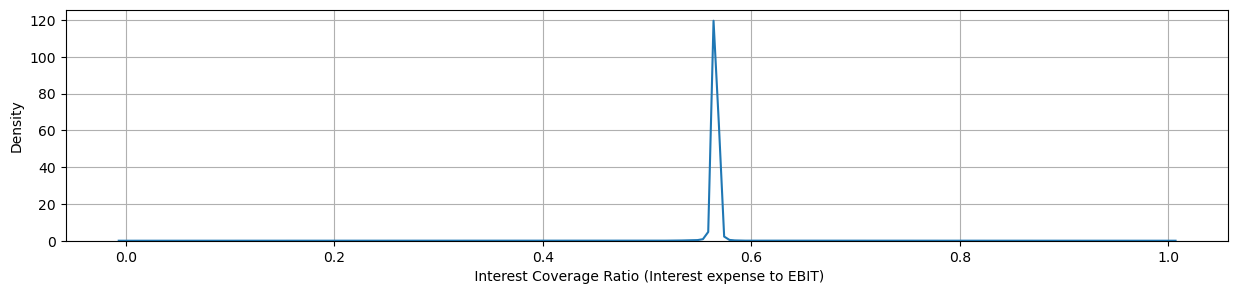

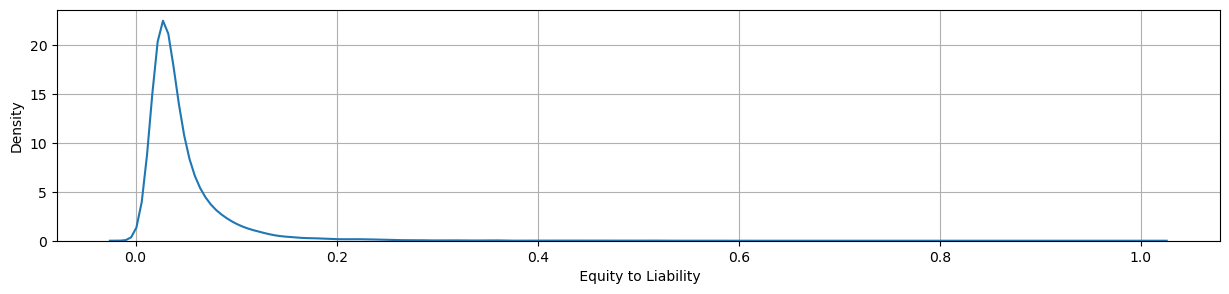

In [56]:
for i in num:
    plt.figure(figsize=(15,3))
    sns.distplot(df.loc[:,i],hist=False)
    plt.grid()
plt.show()

In [57]:
for i in num:
    print("The skewness of",i,"is: ",df.loc[:,i].skew())
    print("------------------------------------------------------------------------------------------------")

The skewness of  ROA(C) before interest and depreciation before interest is:  -0.3239410025682502
------------------------------------------------------------------------------------------------
The skewness of  ROA(A) before interest and % after tax is:  -1.0337268373866921
------------------------------------------------------------------------------------------------
The skewness of  ROA(B) before interest and depreciation after tax is:  -0.7635637203209782
------------------------------------------------------------------------------------------------
The skewness of  Operating Gross Margin is:  -8.04336796118043
------------------------------------------------------------------------------------------------
The skewness of  Realized Sales Gross Margin is:  -8.0665721439936
------------------------------------------------------------------------------------------------
The skewness of  Operating Profit Rate is:  -70.2371643436339
----------------------------------------------------

In [58]:
skew=[]
for i in num:
    skew.append(df.loc[:,i].skew())

In [59]:
skew_dict={'features':num,'skewness':skew}
skew_df = pd.DataFrame(skew_dict)
skew_df

features   skewness
0    ROA(C) before interest and depreciation befor...  -0.323941
1              ROA(A) before interest and % after tax  -1.033727
2    ROA(B) before interest and depreciation after...  -0.763564
3                              Operating Gross Margin  -8.043368
4                         Realized Sales Gross Margin  -8.066572
..                                                ...        ...
89                 Net Income to Stockholder's Equity -37.964701
90                                Liability to Equity  27.459467
91                 Degree of Financial Leverage (DFL)  45.724197
92   Interest Coverage Ratio (Interest expense to ... -13.939528
93                                Equity to Liability   7.401101

[94 rows x 2 columns]

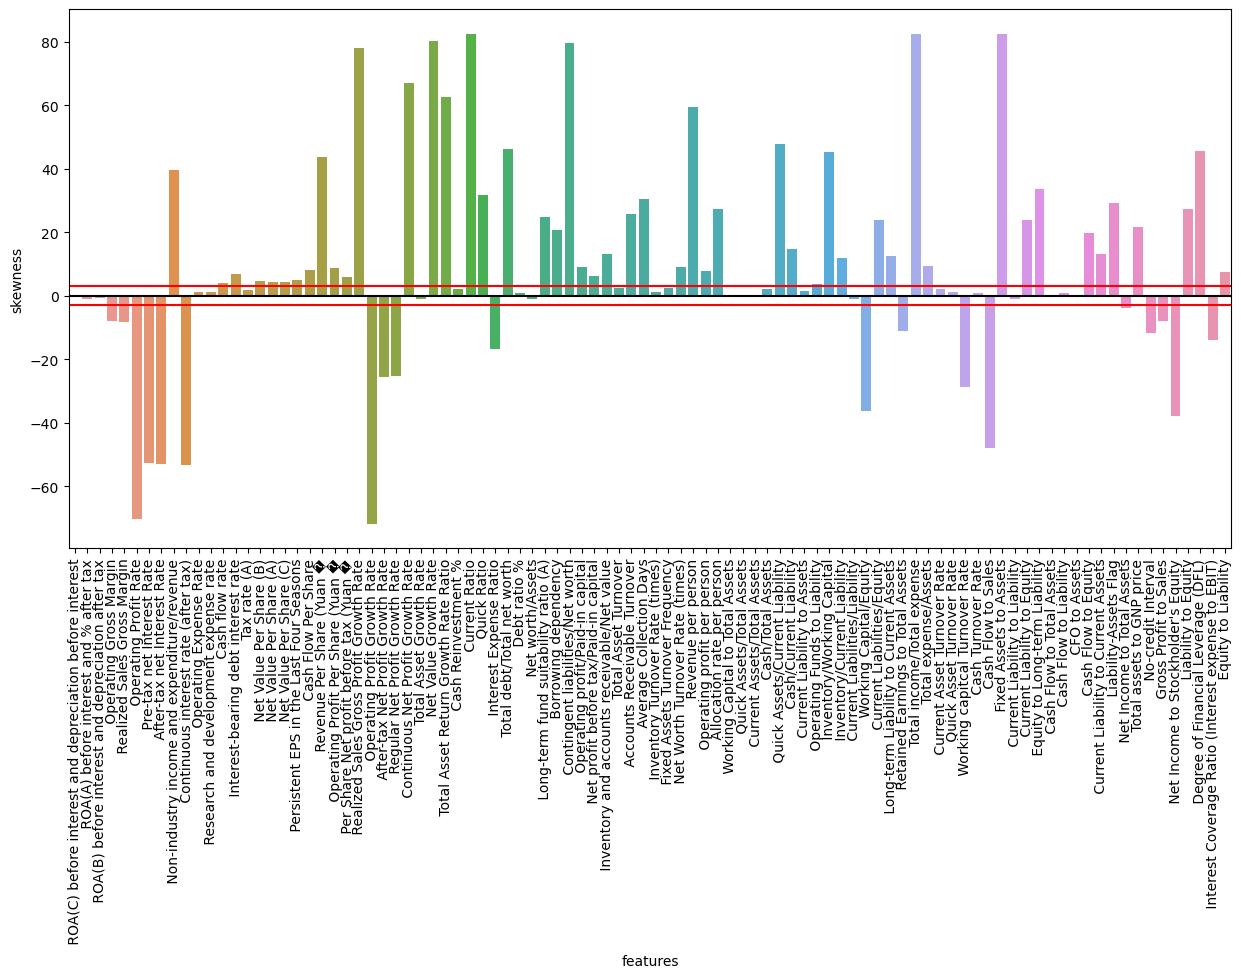

In [60]:
sns.barplot(x=skew_df['features'],y=skew_df['skewness'])
plt.axhline(y=3,color='r')
plt.axhline(y=-3,color='r')
plt.axhline(y=0,color='k')
plt.xticks(rotation=90)
plt.show()

In [61]:
y=df['Bankrupt']
x=df.drop('Bankrupt',axis=1)

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [63]:
# Logistic Regression
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)
lr_model

LogisticRegression()

In [64]:
lr_coef=[]
for i in lr_model.coef_:
    for j in i:
        lr_coef.append(j)

In [65]:
lr_coef

[-4.1349611924129535e-16,
 -4.622150780237496e-16,
 -4.513007257946785e-16,
 -4.2805345682839774e-16,
 -4.2796445246871426e-16,
 -6.856123631429275e-16,
 -5.465052238387813e-16,
 -5.543700870948701e-16,
 -2.080165505958945e-16,
 -5.357553269428757e-16,
 -1.5847010789021616e-10,
 -2.6630745003230797e-10,
 -3.2436081975478437e-16,
 -4.816901728996093e-09,
 -1.1089074995288957e-16,
 -1.560556806501477e-16,
 -1.5614631126397194e-16,
 -1.5610451000194396e-16,
 -1.898841537637581e-16,
 -2.2608347807232503e-16,
 -2.9194860451953928e-09,
 -9.268254838524914e-17,
 -1.5761330863076035e-16,
 -1.743644974392353e-17,
 -5.827475625838106e-16,
 -4.7610250561057e-16,
 -4.760902187995857e-16,
 -1.5003740326260147e-16,
 -3.52944923037043e-10,
 -9.134884489162711e-11,
 -1.8230246771367035e-16,
 -2.663724483745263e-16,
 -2.0809824072286945e-17,
 3.877587635597394e-11,
 -4.331959030888315e-16,
 -1.1411206039189214e-10,
 -1.939137512297835e-17,
 -6.67956442729669e-16,
 -9.536284105405455e-18,
 -2.4395383241

In [66]:
ypred_train = lr_model.predict(xtrain)
ypred_test = lr_model.predict(xtest)

In [67]:
accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test)

(0.9681542007123403, 0.9574780058651027)

In [68]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(xtrain,ytrain)

In [69]:
ypred_train = dt_model.predict(xtrain)
ypred_test = dt_model.predict(xtest)

In [70]:
accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test)

(1.0, 0.9491691104594331)

In [71]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf_model = rf.fit(xtrain,ytrain)

In [72]:
ypred_train = rf_model.predict(xtrain)
ypred_test = rf_model.predict(xtest)

In [73]:
accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test)

(1.0, 0.9652981427174976)

In [74]:
# K-Neighbours Classifier
knn = KNeighborsClassifier()
knn_model = knn.fit(xtrain,ytrain)

In [75]:
ypred_train = knn_model.predict(xtrain)
ypred_test = knn_model.predict(xtest)

In [76]:
accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test)

(0.9708778545987848, 0.9613880742913001)

In [77]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb_model = gnb.fit(xtrain,ytrain)

In [78]:
ypred_train = gnb_model.predict(xtrain)
ypred_test = gnb_model.predict(xtest)

In [79]:
accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test)

(0.0636915985753195, 0.07673509286412512)

In [80]:
# Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier

In [81]:
# Multi-layer Perceptron classifier
mlp = MLPClassifier()

In [82]:
#mlp = MLPClassifier()

#params = [{'activation':['tanh','identity','logistic','relu'],'alpha': np.logspace(0.001,0.01,num=100),'solver': ['lbfgs','sgd','adam']}]
          
#grd = GridSearchCV(estimator=mlp,param_grid=params,cv=3)

#grd_model = grd.fit(xtrain,ytrain)
          
#grd_model.best_params_

In [83]:
# The result of GridSearchCV is giving the following results:
# 'activation': 'tanh', 'alpha': 1.0058783356953453, 'solver': 'sgd'

In [84]:
mlp = MLPClassifier(activation='tanh',
                    alpha = 1.0058783356953453,
                    solver='sgd')
mlp_model = mlp.fit(xtrain,ytrain)

In [85]:
ypred_train = mlp_model.predict(xtrain)
ypred_test = mlp_model.predict(xtest)

In [86]:
accuracy_score(ytrain,ypred_train),accuracy_score(ytest,ypred_test)

(0.9694112717368532, 0.9599217986314761)

In [87]:
# Multi-layer Perceptron classifier is giving very good accuracy for the data.
# Feature Importances
rf = RandomForestClassifier()
rf_model = rf.fit(xtrain,ytrain)
rf_model.feature_importances_

array([0.01065519, 0.01500956, 0.01052742, 0.01025611, 0.00718829,
       0.00899484, 0.00933619, 0.0076324 , 0.02019117, 0.01170607,
       0.01073487, 0.0084576 , 0.0059252 , 0.01728975, 0.00357627,
       0.01630913, 0.01404727, 0.02013036, 0.01818107, 0.00606916,
       0.0072541 , 0.00695306, 0.01328835, 0.00423163, 0.00747719,
       0.00881963, 0.00620998, 0.00872746, 0.00690406, 0.03201418,
       0.0108096 , 0.00543898, 0.00787828, 0.01160907, 0.01881033,
       0.01726547, 0.01048919, 0.01473285, 0.00696506, 0.01572201,
       0.00643457, 0.00935556, 0.02088554, 0.00736947, 0.00701087,
       0.0119645 , 0.01179682, 0.00787799, 0.01624722, 0.00550227,
       0.00810449, 0.00900581, 0.01157404, 0.00893752, 0.00770532,
       0.0059895 , 0.01833756, 0.01216164, 0.0165526 , 0.01017368,
       0.00865796, 0.0143061 , 0.00520149, 0.0065877 , 0.01140071,
       0.00702445, 0.00573006, 0.00974751, 0.01175387, 0.00657394,
       0.00665598, 0.00836476, 0.01023341, 0.007538  , 0.00704

In [88]:
importances = pd.DataFrame({'Features':xtrain.columns,'Feature Importances':rf_model.feature_importances_})
importances

Features  Feature Importances
0    ROA(C) before interest and depreciation befor...             0.010655
1              ROA(A) before interest and % after tax             0.015010
2    ROA(B) before interest and depreciation after...             0.010527
3                              Operating Gross Margin             0.010256
4                         Realized Sales Gross Margin             0.007188
..                                                ...                  ...
89                 Net Income to Stockholder's Equity             0.030631
90                                Liability to Equity             0.013020
91                 Degree of Financial Leverage (DFL)             0.014349
92   Interest Coverage Ratio (Interest expense to ...             0.021082
93                                Equity to Liability             0.012871

[94 rows x 2 columns]

In [89]:
imp = importances.sort_values(by='Feature Importances',ascending=False)
imp

Features  Feature Importances
29                              Net Value Growth Rate             0.032014
89                 Net Income to Stockholder's Equity             0.030631
92   Interest Coverage Ratio (Interest expense to ...             0.021082
42              Net profit before tax/Paid-in capital             0.020886
8         Non-industry income and expenditure/revenue             0.020191
..                                                ...                  ...
31                                Cash Reinvestment %             0.005439
62                        Inventory/Current Liability             0.005201
23            Realized Sales Gross Profit Growth Rate             0.004232
14                                       Tax rate (A)             0.003576
84                              Liability-Assets Flag             0.000147

[94 rows x 2 columns]

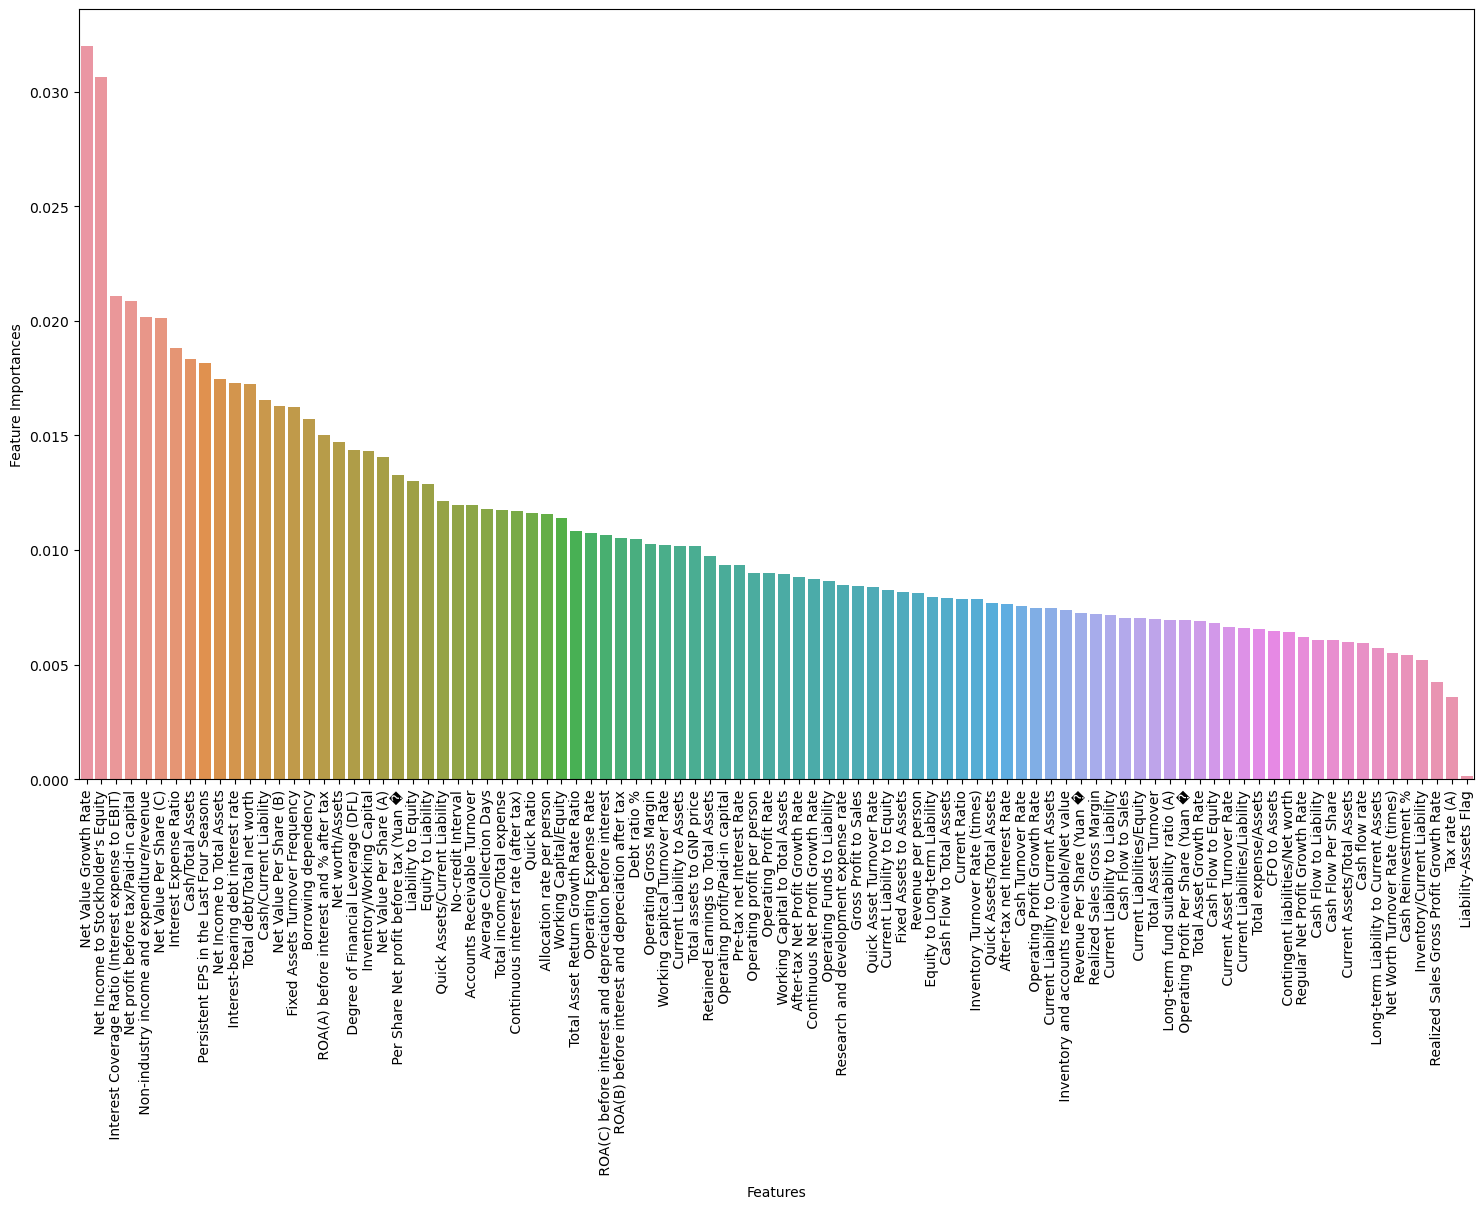

In [90]:
plt.figure(figsize=(18,10))
sns.barplot(y='Feature Importances',x='Features',data=imp)
plt.xticks(rotation=90)
plt.show()

In [91]:
imp['Features'][0:9].values

array([' Net Value Growth Rate', " Net Income to Stockholder's Equity",
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Net profit before tax/Paid-in capital',
       ' Non-industry income and expenditure/revenue',
       ' Net Value Per Share (C)', ' Interest Expense Ratio',
       ' Cash/Total Assets', ' Persistent EPS in the Last Four Seasons'],
      dtype=object)

In [92]:
# ' Net Value Growth Rate',' Persistent EPS in the Last Four Seasons',
# " Net Income to Stockholder's Equity",' Net Income to Total Assets',
# ' Net profit before tax/Paid-in capital',' Per Share Net profit before tax (Yuan ¥)',
# ' Degree of Financial Leverage (DFL)', ' Borrowing dependency',
# ' Non-industry income and expenditure/revenue' are some of the most important
# factors which result in the bankruptcy of a company/organisation

In [ ]:
###############################################################################

In [ ]:
############################## Person 7 #######################################

In [ ]:
# EDA
# Ploting interesting features

f, axes=plt.subplots(ncols=4, figsize=(24, 6))

sns.boxplot(x='Bankrupt', y=' Net Income to Total Assets', data=df, ax=axes[0])
axes[0].set_title('Bankrupt Vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt', y=' Total debt/Total net worth', data=df, ax=axes[1])
axes[1].set_title('Bankrupt Vs Total debt/Total net worth Correlation')

sns.boxplot(x='Bankrupt', y=' Debt ratio %', data=df, ax=axes[2])
axes[2].set_title('Bankrupt Vs Debt ratio % Correlation')

sns.boxplot(x='Bankrupt', y=' Net worth/Assets', data=df, ax=axes[3])
axes[3].set_title('Bankrupt Vs Net worth/Assets Correlation')

plt.show()

In [ ]:
# Let's take a lookt at the distribution of these features for companies that are close to bankruptcy.
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df[' Total debt/Total net worth'].loc[df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df[' Debt ratio %'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df[' Net worth/Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

In [ ]:
# Removing the outliers
def remove_outliers(feature, feature_name, df):
    q25, q75=np.percentile(feature, 25), np.percentile(feature, 75) # It identifies 25th and 75th quartiles 
    print('Quartle 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr=q75-q25
    print('iqr: {}'.format(feat_iqr))
    feat_cut_off=feat_iqr*1.5
    feat_lower, feat_upper=q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = df.drop(df[(df[feature_name] > feat_upper) | (df[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return df

for col in df:
    new_df=remove_outliers(df[col], str(col), df)


In [ ]:
print('After remover outliers: ', new_df.shape)
print('Original dataset: ', df.shape)

In [ ]:
# Performance Evaluation
# Cross Validation
# One way to evaluate the performance and to find its accuracy is to use k-fold
# cross validation technique. The following code randomly splits the data into 10 
# distinct subsets or folds, then it trains and evaluates the model 10 times by 
# picking a different fold for evaluation every time and training on other 9 folds.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')

In [ ]:
# Confusion Matrix
# Another way to evaluate a model's performance is to take a look at the confusion matrix becuase it counts the number of times instances of class A are classifed as class B.

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

In [ ]:
# Each row in this confusion matrix represents an actual class, and each column 
# represents a predicted class. 1966 of them are correctly classified which is 
# called 'True Negative', while the remaining 2 are wrongly classified, called 
# 'False Positive'. In the second row, 78 of them are wrongly classifed which is 
# called 'False Negative', while there is 0 'True positive'.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Classification Report: ')
print(metrics.classification_report(y_test, y_pred))
y_pred=pd.DataFrame(y_pred)
print(y_pred[0].value_counts())

In [ ]:
# Logistic Regression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)
print('Classification Report: ')
print(metrics.classification_report(y_test, y_pred))
y_pred=pd.DataFrame(y_pred)
print(y_pred[0].value_counts())

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

forest_clf=RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1)
forest_clf.fit(X_train, y_train)
y_pred=forest_clf.predict(X_test)

print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)
print('Classification Report: ')
print(metrics.classification_report(y_test, y_pred))
y_pred=pd.DataFrame(y_pred)
print(y_pred[0].value_counts())

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train, y_train)
y_pred=svm_clf.predict(X_test)

print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)
print('Classification Report: ')
print(metrics.classification_report(y_test, y_pred))

y_pred=pd.DataFrame(y_pred)
print(y_pred[0].value_counts())

In [ ]:
# Here we check if all columns are scaled or not
count = 0
not_scaled = []
for col in df.columns:
    if max(df[col])>1:
        print("not scaled : ", col)
        count += 1
        not_scaled.append(col)

In [1]:
!pip install lazypredict